In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)

In [2]:
library(readr)
library('DESeq2')
library(ggplot2)
library(cowplot)
library(org.Hs.eg.db)
library(stringr)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The follow

# Loading the featureCounts DF

In [3]:
count_df_24h = read_tsv("../alignments/bulk/counts.featurecounts.hisat2.tsv", comment="#")
head(count_df_24h)

Rows: 61541 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Geneid, Chr, Start, End, Strand
dbl (5): Length, SUM159_24h_R1.bam, SUM159_24h_R2.bam, SUM159R_24h_R1.bam, S...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Geneid         
1 ENSG00000186827
2 ENSG00000186891
3 ENSG00000160072
4 ENSG00000260179
5 ENSG00000234396
6 ENSG00000225972
  Chr                                                                                                                          
1 1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1                                                                                              
2 1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1                                                                                          
3 1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;1
4 1                                                                                                                            
5 1;1                                                                                                                          
6 1                                                                                                                            
  Start                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1 1211340;1211340;1211704;1211942;1211942;1212019;1212638;1212638;1212638;1212992;1212992;1212992;1213395;1213663;1213983;1213983                                                                                                                                                                                                                                                                                                                                                                                        
2 1203508;1203508;1203844;1203844;1204034;1204034;1204055;1204399;1204399;1204399;1204399;1205370;1205370;1205370;1205370;1206385;1206385;1206385                                                                                                                                                                                                                                                                                                                                                                        
3 1471765;1471784;1477274;1477274;1478026;1478644;1479049;1479049;1479049;1480867;1480867;1480867;1480867;1482138;1482138;1482138;1482266;1482545;1482545;1482545;1482545;1483485;1484569;1485016;1485016;1485016;1485782;1485782;1485782;1485782;1485782;1486110;1486110;1486110;1486110;1486544;1486544;1486544;1486544;1486544;1487863;1487863;1487863;1487863;1489204;1489204;1489204;1489204;1489204;1489692;1490257;1490257;1490257;1490257;1490563;1490563;1490563;1490563;1495485;1495485;1495485;1495485;1495485
4 1249777                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
5 2212523;2220535                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [4]:
expr_df_24h = as.data.frame(count_df_24h[,c("Geneid", "SUM159_24h_R1.bam", "SUM159_24h_R2.bam",  "SUM159R_24h_R1.bam", "SUM159R_24h_R2.bam")])
colnames(expr_df_24h) = gsub("\\.bam$", "", colnames(expr_df_24h))
head(expr_df_24h)

Geneid          SUM159_24h_R1 SUM159_24h_R2 SUM159R_24h_R1 SUM159R_24h_R2
1 ENSG00000186827   0             1             1              0           
2 ENSG00000186891   0             2             0              0           
3 ENSG00000160072 159           426           803            394           
4 ENSG00000260179   2             2             3              2           
5 ENSG00000234396   0             0             0              0           
6 ENSG00000225972   1            19            36             35

In [5]:
#require("biomaRt")
#mart <- useMart("ENSEMBL_MART_ENSEMBL")
#mart <- useDataset("hsapiens_gene_ensembl", mart)

In [6]:
#listAttributes(mart)[grepl("entrez", listAttributes(mart)$name) ,]

In [7]:
#bmA = getBM(attributes=c("ensembl_gene_id", "hgnc_symbol", "gene_biotype", "external_gene_name", "entrezgene_id"), filters="ensembl_gene_id", values=expr_df_24h$Geneid, mart=mart)
#bmA$symbol <- mapIds(org.Hs.eg.db,
#                     keys=bmA$ensembl_gene_id,
#                     column="SYMBOL",
#                     keytype="ENSEMBL",
#                     multiVals="first")
#head(bmA)

In [8]:
gencodeAnnot = as.data.frame(read_tsv("../references/gencode.grch38.human.35.gtfout.list"))
colnames(gencodeAnnot) = c("gene_stable_id", "gene_name", "biotype")
gencodeAnnot$gene_stable_id = gsub("\\.[0-9]+$", "", gencodeAnnot$gene_stable_id)
head(gencodeAnnot)

Rows: 60715 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Gene stable ID, Gene name, Gene type


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



gene_stable_id  gene_name biotype       
1 ENSG00000000003 TSPAN6    protein_coding
2 ENSG00000000005 TNMD      protein_coding
3 ENSG00000000419 DPM1      protein_coding
4 ENSG00000000457 SCYL3     protein_coding
5 ENSG00000000460 C1orf112  protein_coding
6 ENSG00000000938 FGR       protein_coding

In [9]:
rownames(expr_df_24h) = expr_df_24h$Geneid
expr_df_24h$Geneid = NULL
head(expr_df_24h)

SUM159_24h_R1 SUM159_24h_R2 SUM159R_24h_R1 SUM159R_24h_R2
ENSG00000186827   0             1             1              0           
ENSG00000186891   0             2             0              0           
ENSG00000160072 159           426           803            394           
ENSG00000260179   2             2             3              2           
ENSG00000234396   0             0             0              0           
ENSG00000225972   1            19            36             35

In [10]:
#library("Rsubread")
#featureCounts(files=c("/mnt/w/game_cibog/alignments/bulk/SUM159_24h_R1.bam", "/mnt/w/game_cibog/alignments/bulk/SUM159_24h_R2.bam", "/mnt/w/game_cibog/alignments/bulk/SUM159R_24h_R1.bam", "/mnt/w/game_cibog/alignments/bulk/SUM159R_24h_R2.bam"),annot.ext="/mnt/w/game_cibog/references/gencode.nochr.v39.annotation.gtf",isGTFAnnotationFile=TRUE,GTF.featureType="exon",GTF.attrType="gene_name")

In [11]:
pdat_24h = data.frame( id=c("SUM159_24h_R1","SUM159_24h_R2", "SUM159R_24h_R1","SUM159R_24h_R2"),
                       group=c("SUM159_24h", "SUM159_24h", "SUM159R_24h", "SUM159R_24h") )
pdat_24h

id             group      
1 SUM159_24h_R1  SUM159_24h 
2 SUM159_24h_R2  SUM159_24h 
3 SUM159R_24h_R1 SUM159R_24h
4 SUM159R_24h_R2 SUM159R_24h

# DESeq2 analysis for 24h

In [12]:
dds_24h <- DESeqDataSetFromMatrix(countData=expr_df_24h, 
                                  colData=pdat_24h,
                                  design=~group, tidy = FALSE)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [13]:
dds_24h <- DESeq(dds_24h)
res_lfc_24h <- lfcShrink(dds_24h, coef=resultsNames(dds_24h)[[2]], type="apeglm")
res_lfc_24h <- res_lfc_24h[order(res_lfc_24h$padj, decreasing=FALSE),]


res_24h <- results(dds_24h)
res_24h <- res_24h[order(res_24h$padj, decreasing=FALSE),]


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



In [14]:
res_24h

log2 fold change (MLE): group SUM159R 24h vs SUM159 24h 
Wald test p-value: group SUM159R 24h vs SUM159 24h 
DataFrame with 61541 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat       pvalue
                <numeric>      <numeric> <numeric> <numeric>    <numeric>
ENSG00000168542   7623.80       -8.02475 0.1588638  -50.5134  0.00000e+00
ENSG00000254166   7798.00       -5.75391 0.1163925  -49.4354  0.00000e+00
ENSG00000196611   4798.88        4.01435 0.1010456   39.7281  0.00000e+00
ENSG00000211448   3935.12       -7.21620 0.1656618  -43.5598  0.00000e+00
ENSG00000104368  17205.64        2.85588 0.0806421   35.4142 1.03324e-274
...                   ...            ...       ...       ...          ...
ENSG00000277856  0.283435         1.4313   4.96381  0.288347     0.773081
ENSG00000275987  0.412130        -2.1556   4.93985 -0.436371     0.662568
ENSG00000268674  0.000000             NA        NA        NA           NA
ENSG00000277475  0.412130        -2.1

In [15]:
res_lfc_24h

log2 fold change (MAP): group SUM159R 24h vs SUM159 24h 
Wald test p-value: group SUM159R 24h vs SUM159 24h 
DataFrame with 61541 rows and 5 columns
                 baseMean log2FoldChange     lfcSE       pvalue         padj
                <numeric>      <numeric> <numeric>    <numeric>    <numeric>
ENSG00000168542   7623.80       -8.01821 0.1590666  0.00000e+00  0.00000e+00
ENSG00000254166   7798.00       -5.74974 0.1165984  0.00000e+00  0.00000e+00
ENSG00000196611   4798.88        4.00955 0.1011819  0.00000e+00  0.00000e+00
ENSG00000211448   3935.12       -7.20920 0.1654849  0.00000e+00  0.00000e+00
ENSG00000104368  17205.64        2.84687 0.0806986 1.03324e-274 4.61547e-271
...                   ...            ...       ...          ...          ...
ENSG00000277856  0.283435      0.0540534  0.755821     0.773081           NA
ENSG00000275987  0.412130     -0.0632125  0.757773     0.662568           NA
ENSG00000268674  0.000000             NA        NA           NA           NA
ENSG

In [16]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)

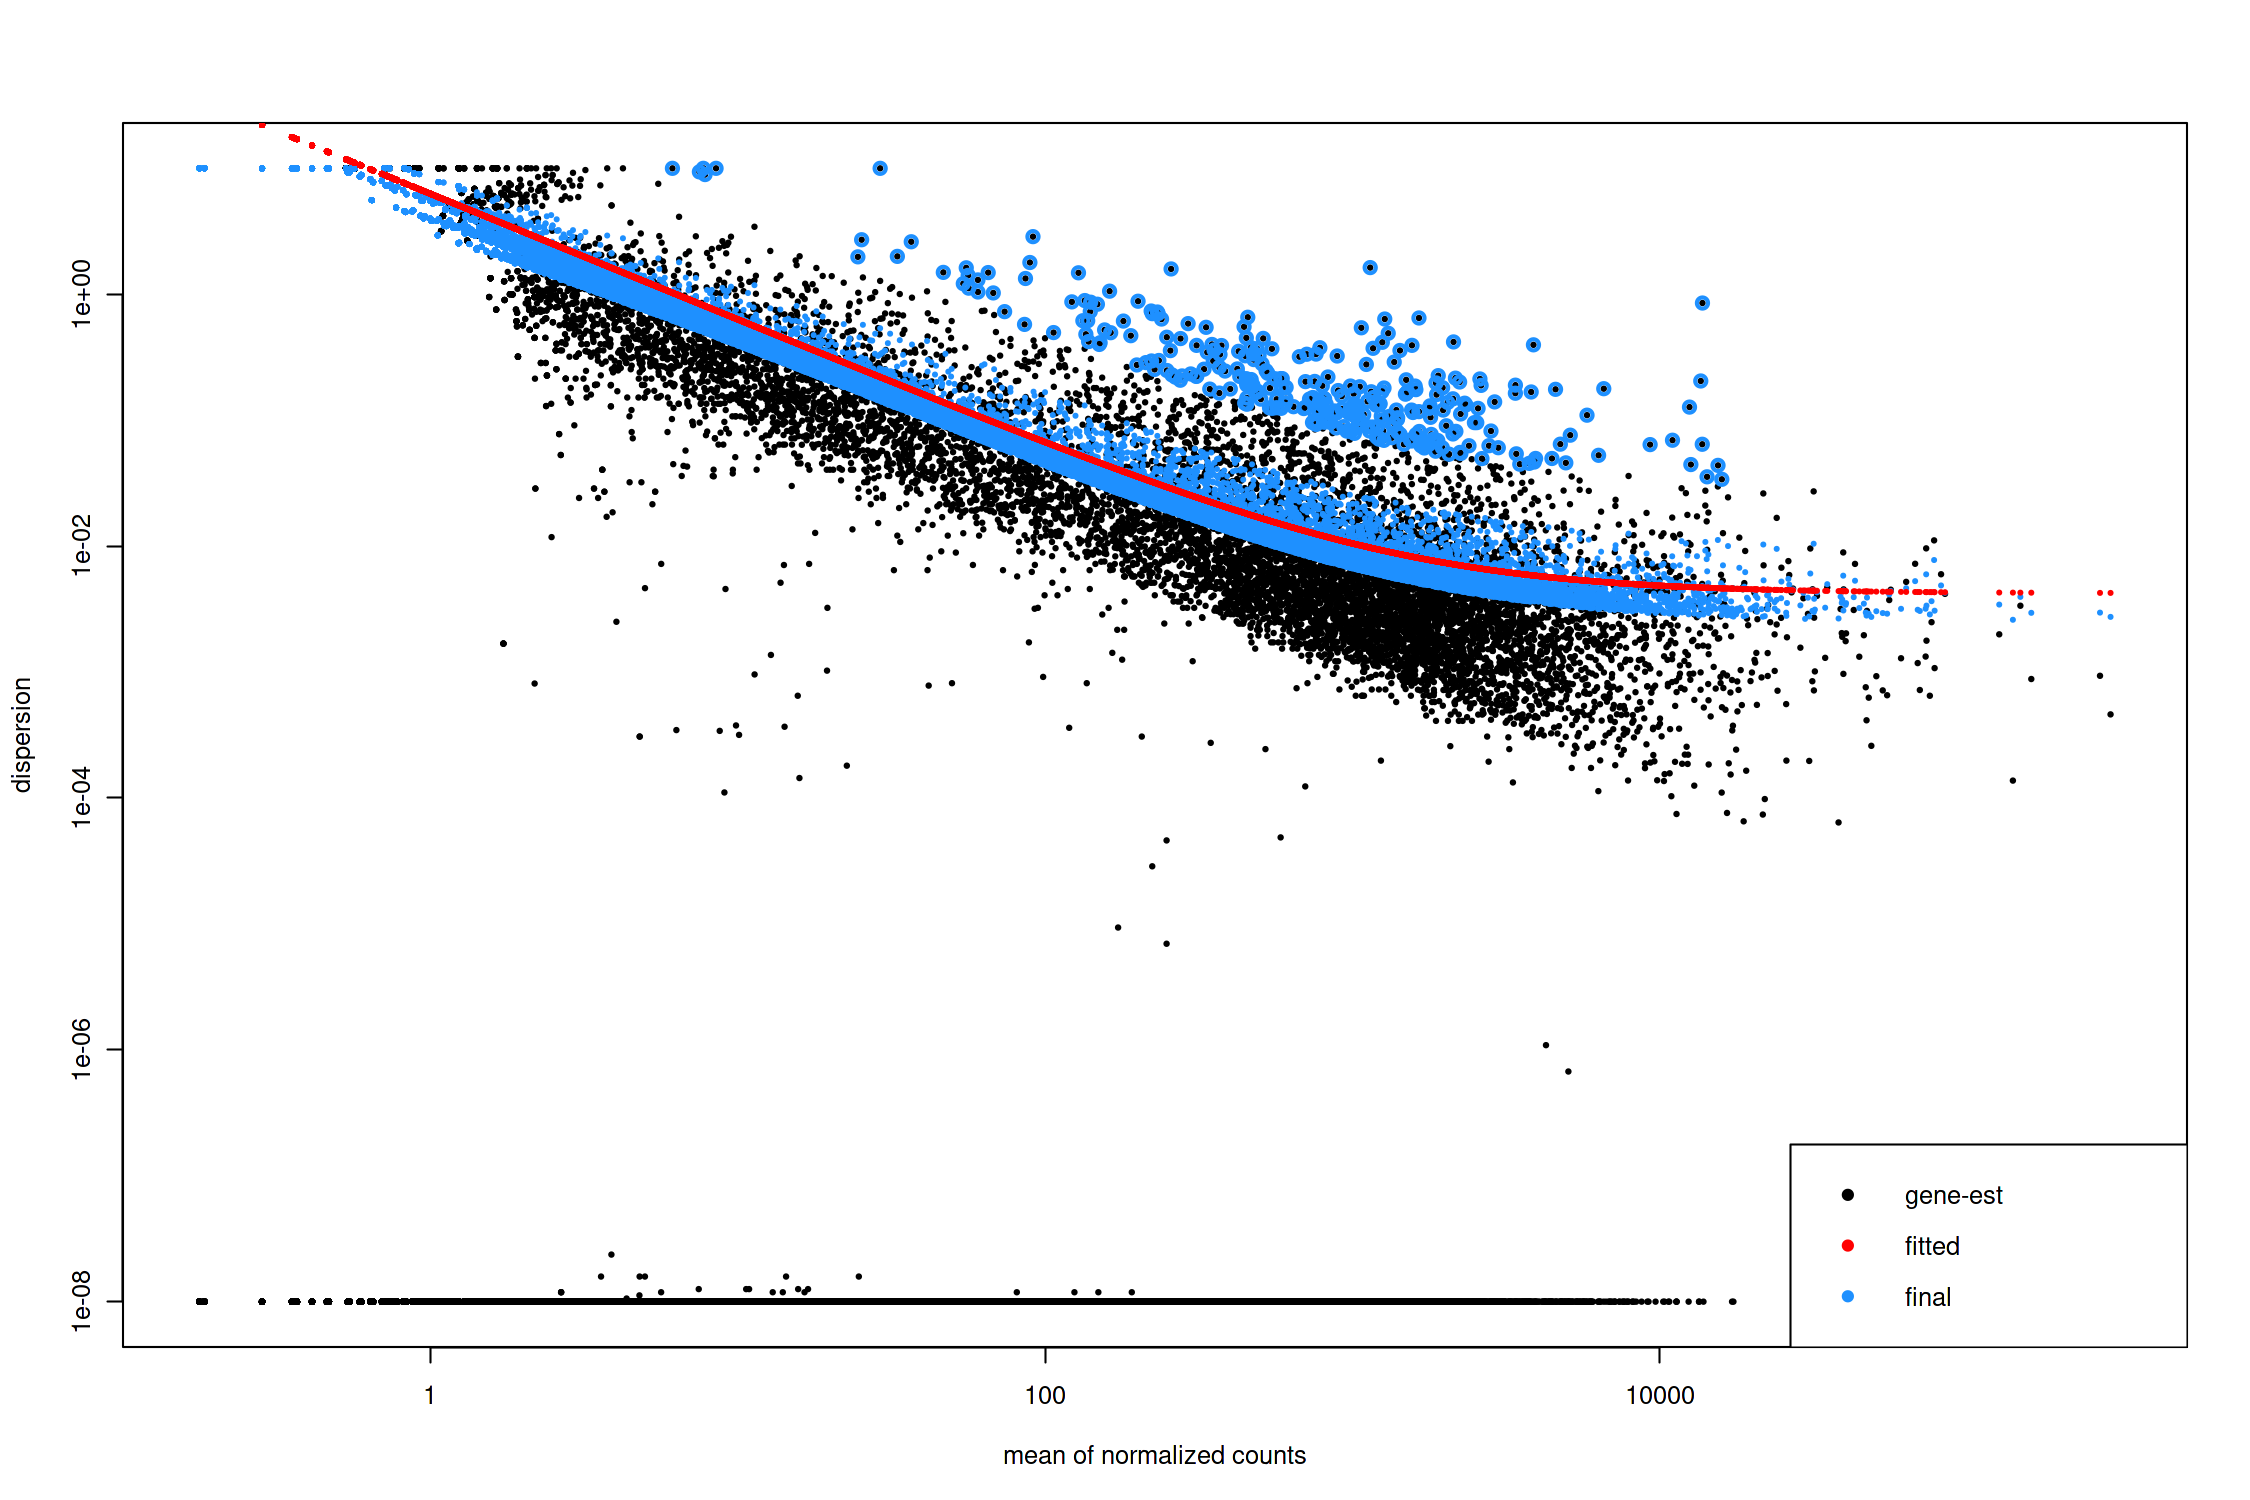

In [17]:
plotDispEsts(dds_24h)

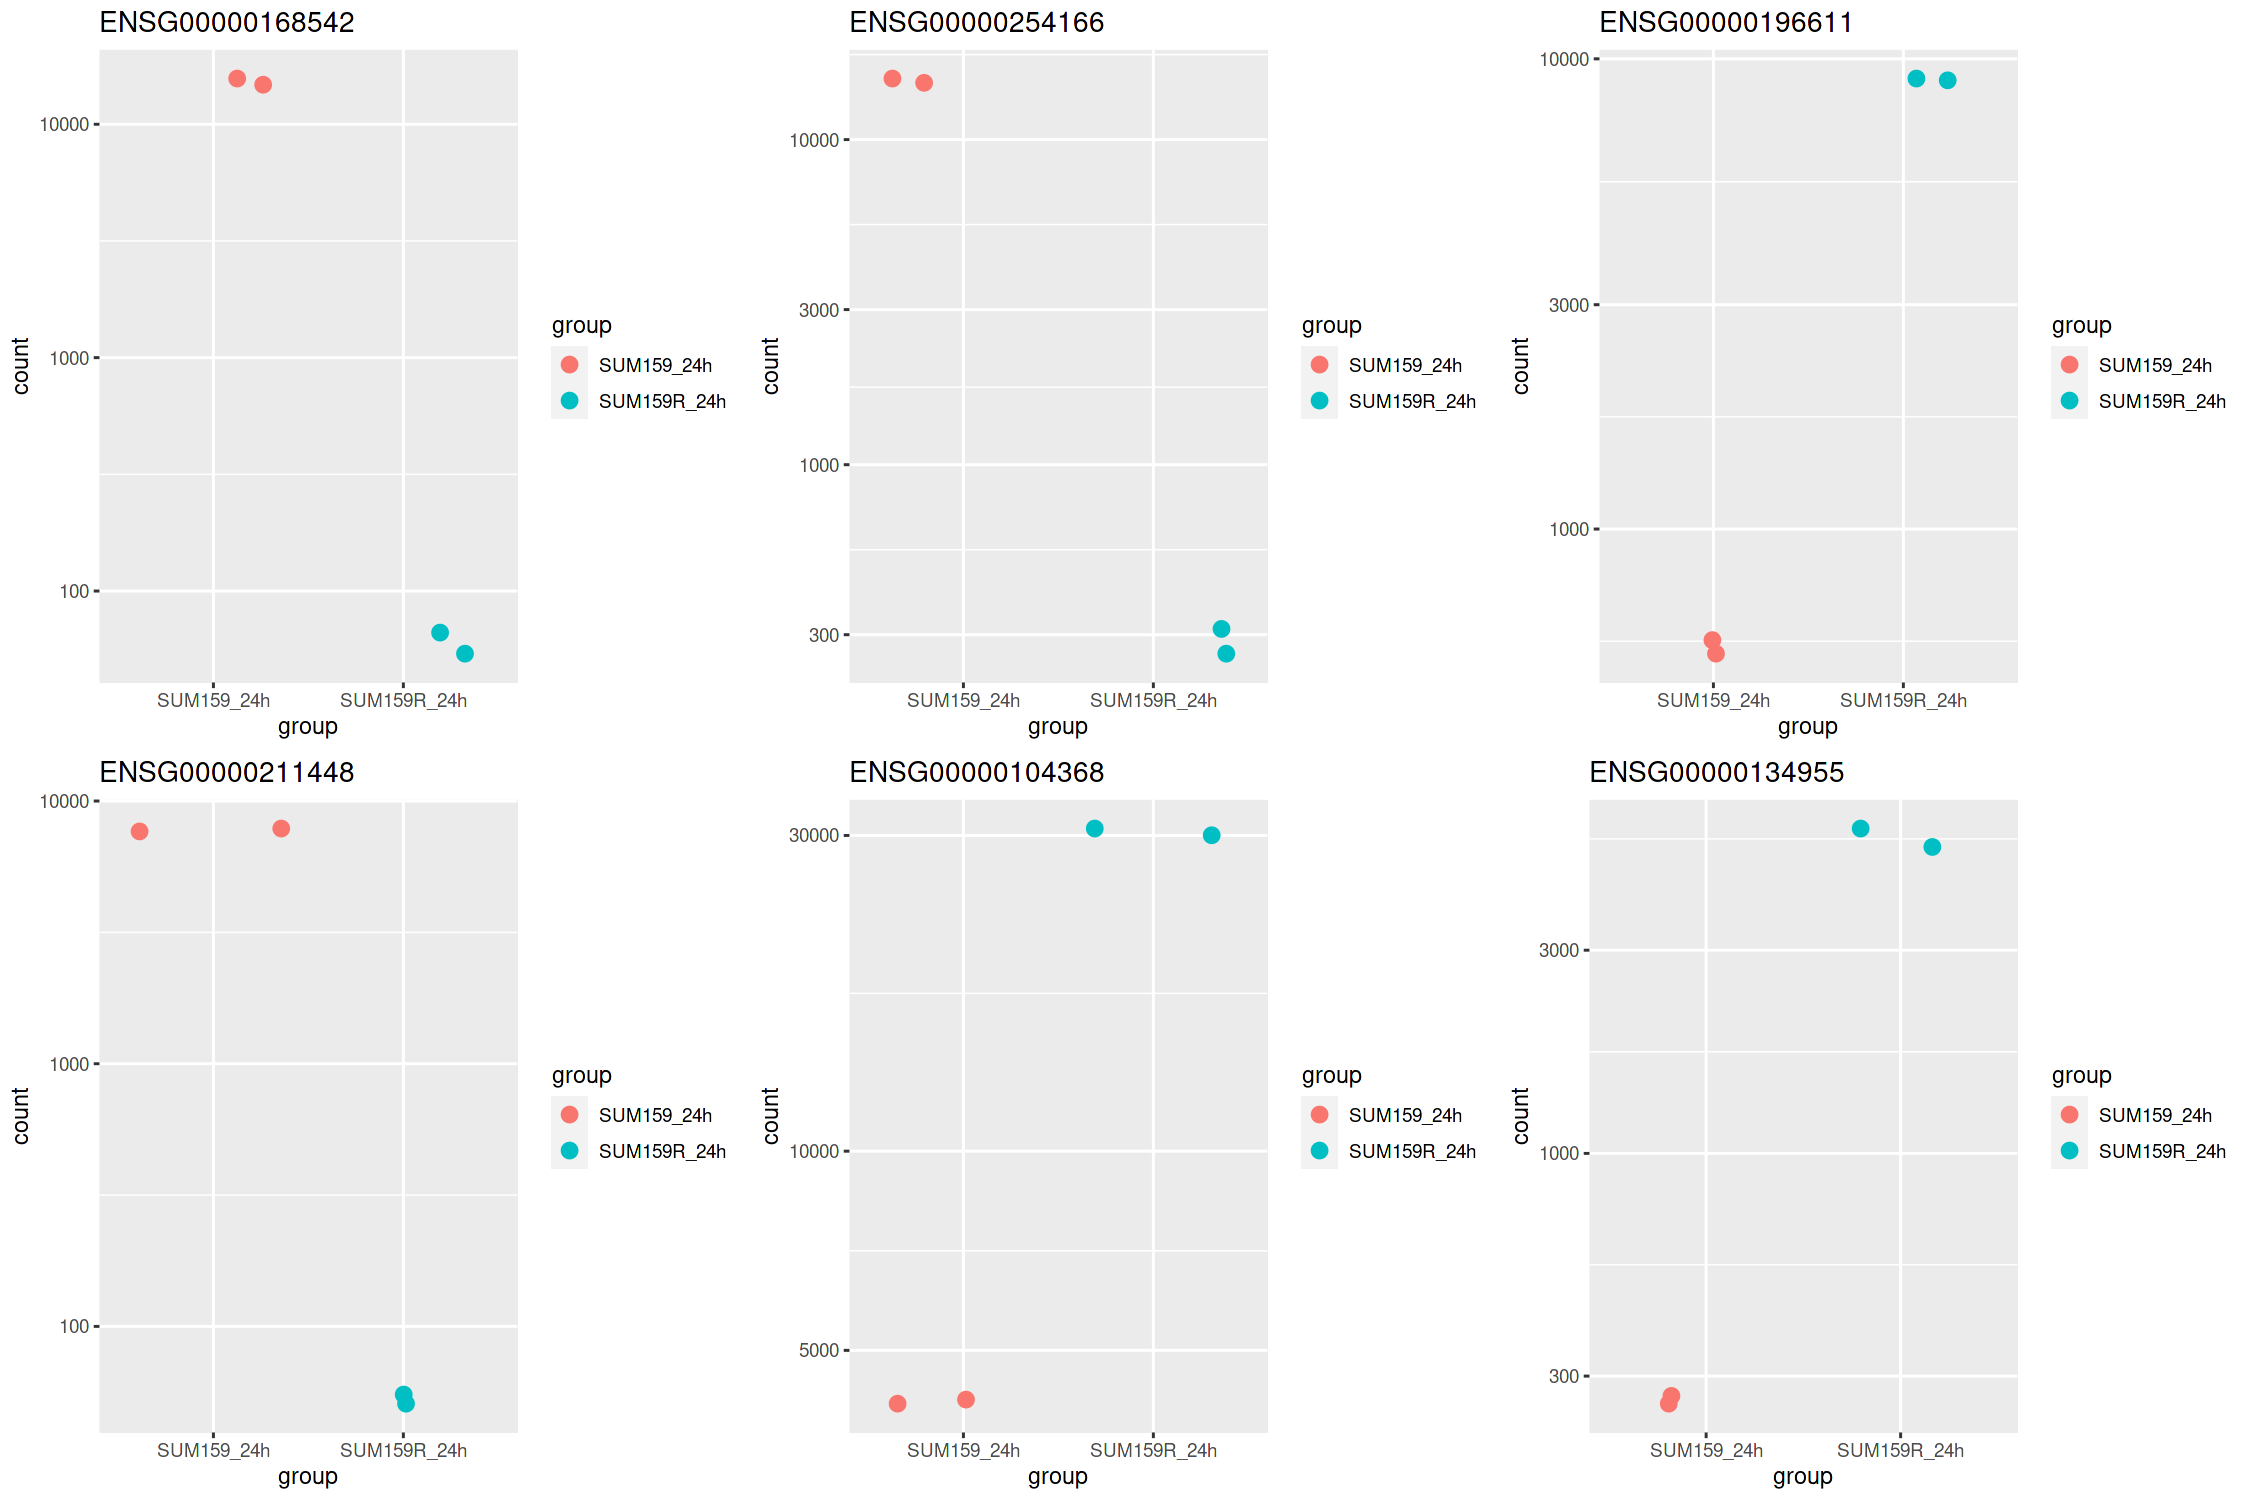

In [18]:
allplots = list()

for (geneName in rownames(head(res_lfc_24h, n=6)))
{
    data = plotCounts(dds_24h, gene=geneName, intgroup="group",returnData = TRUE)

    p = ggplot(data, aes(x=group, y=count, color=group)) + 
  geom_jitter(size=3) + ggtitle(geneName)+
  scale_y_log10()

  allplots[[geneName]] = p
}

cowplot::plot_grid(plotlist= allplots)

In [19]:
rownames(head(res_lfc_24h))

[1] "ENSG00000168542" "ENSG00000254166" "ENSG00000196611" "ENSG00000211448"
[5] "ENSG00000104368" "ENSG00000134955"

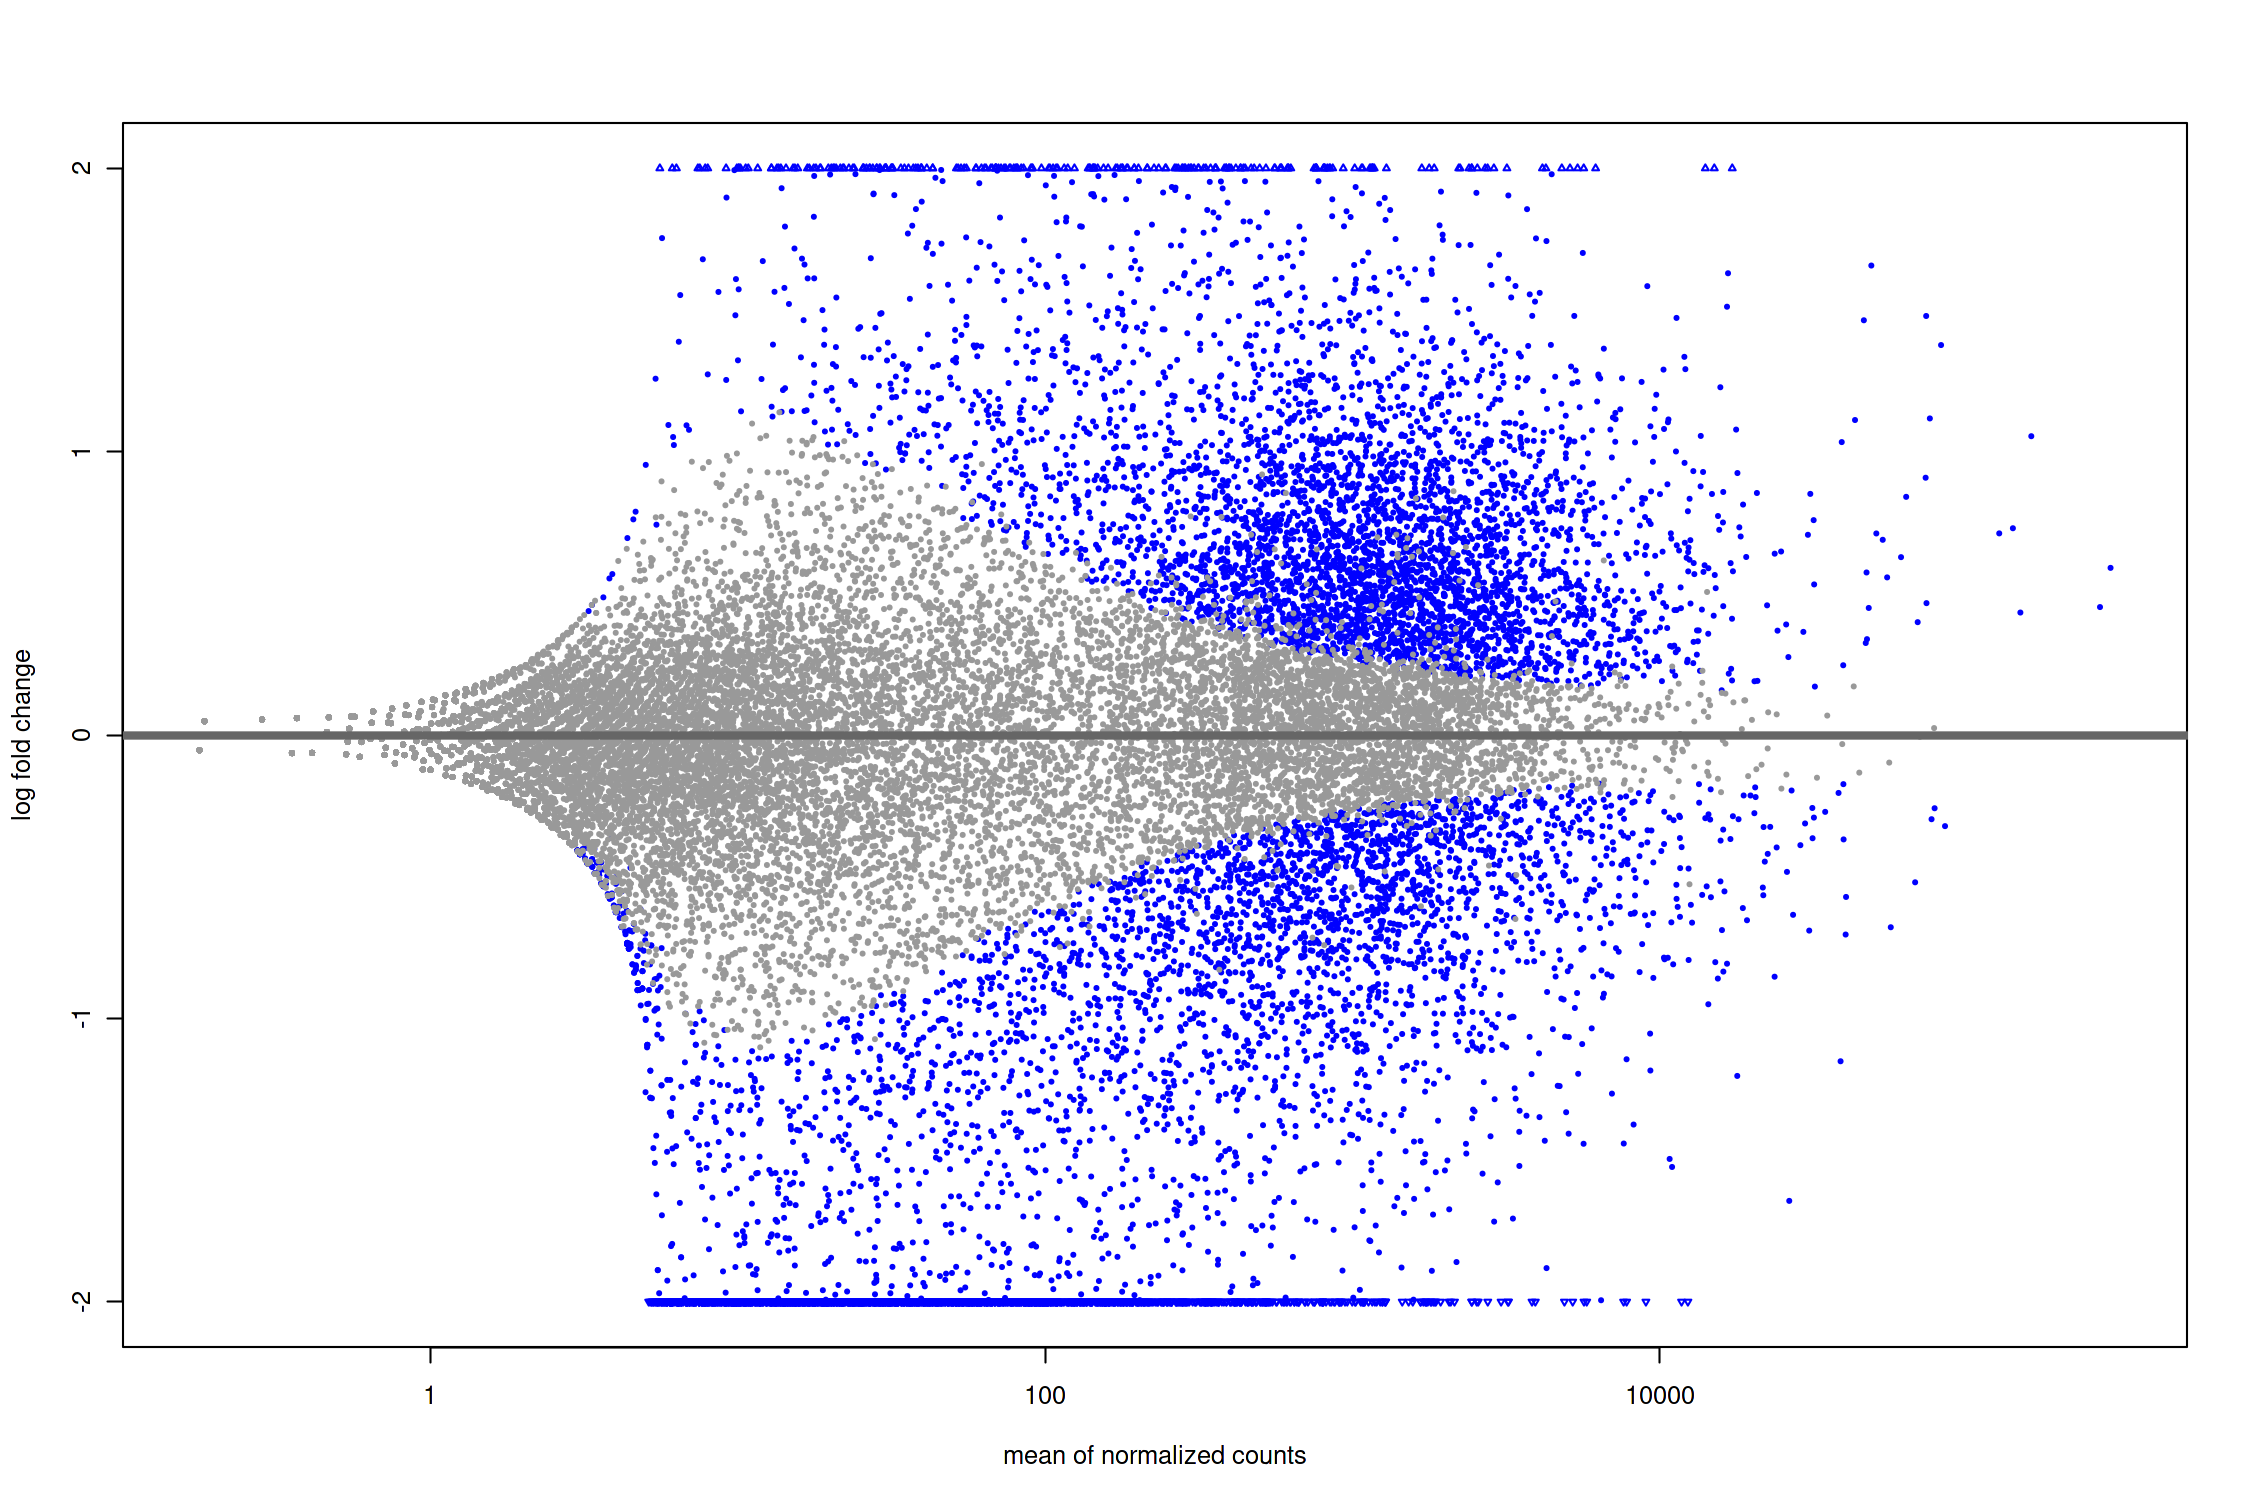

In [20]:
plotMA(res_lfc_24h, ylim=c(-2,2))


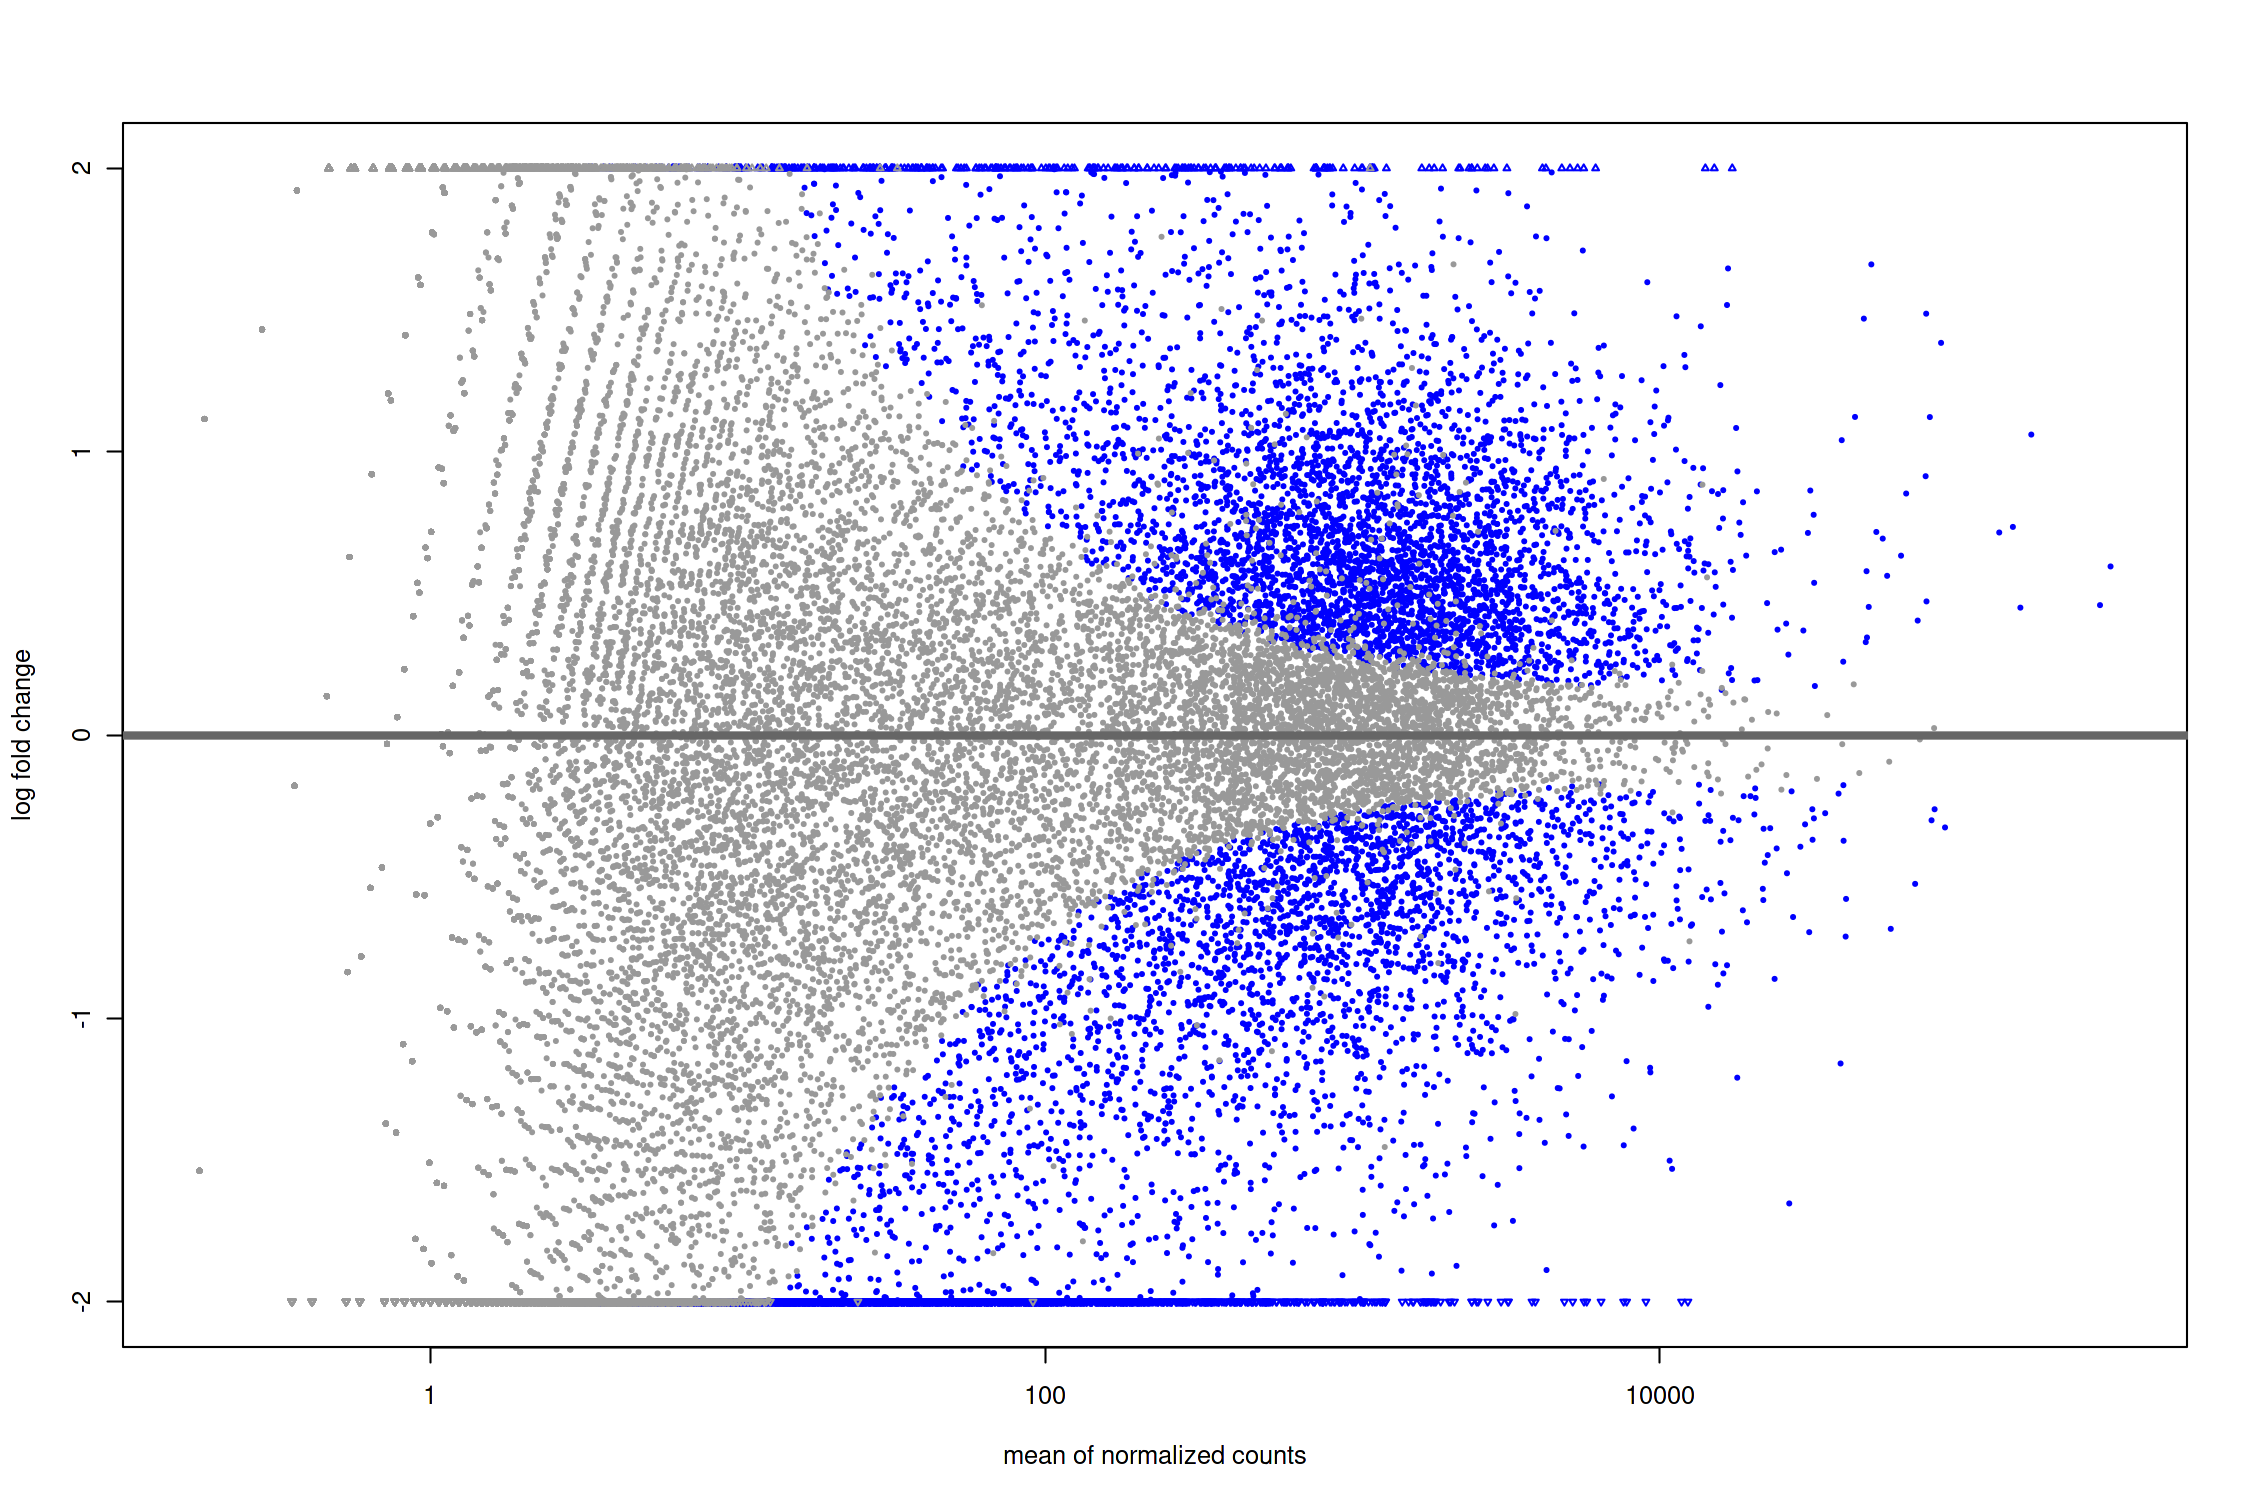

In [21]:
plotMA(res_24h, ylim=c(-2,2))

In [22]:
resultsNames(dds_24h)

[1] "Intercept"                       "group_SUM159R_24h_vs_SUM159_24h"

In [23]:
resLFC_24h <- lfcShrink(dds_24h, coef="group_SUM159R_24h_vs_SUM159_24h", type="apeglm")
resNorm_24h <- lfcShrink(dds_24h, coef="group_SUM159R_24h_vs_SUM159_24h", type="normal")
resAsh_24h <- lfcShrink(dds_24h, coef="group_SUM159R_24h_vs_SUM159_24h", type="ashr")


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



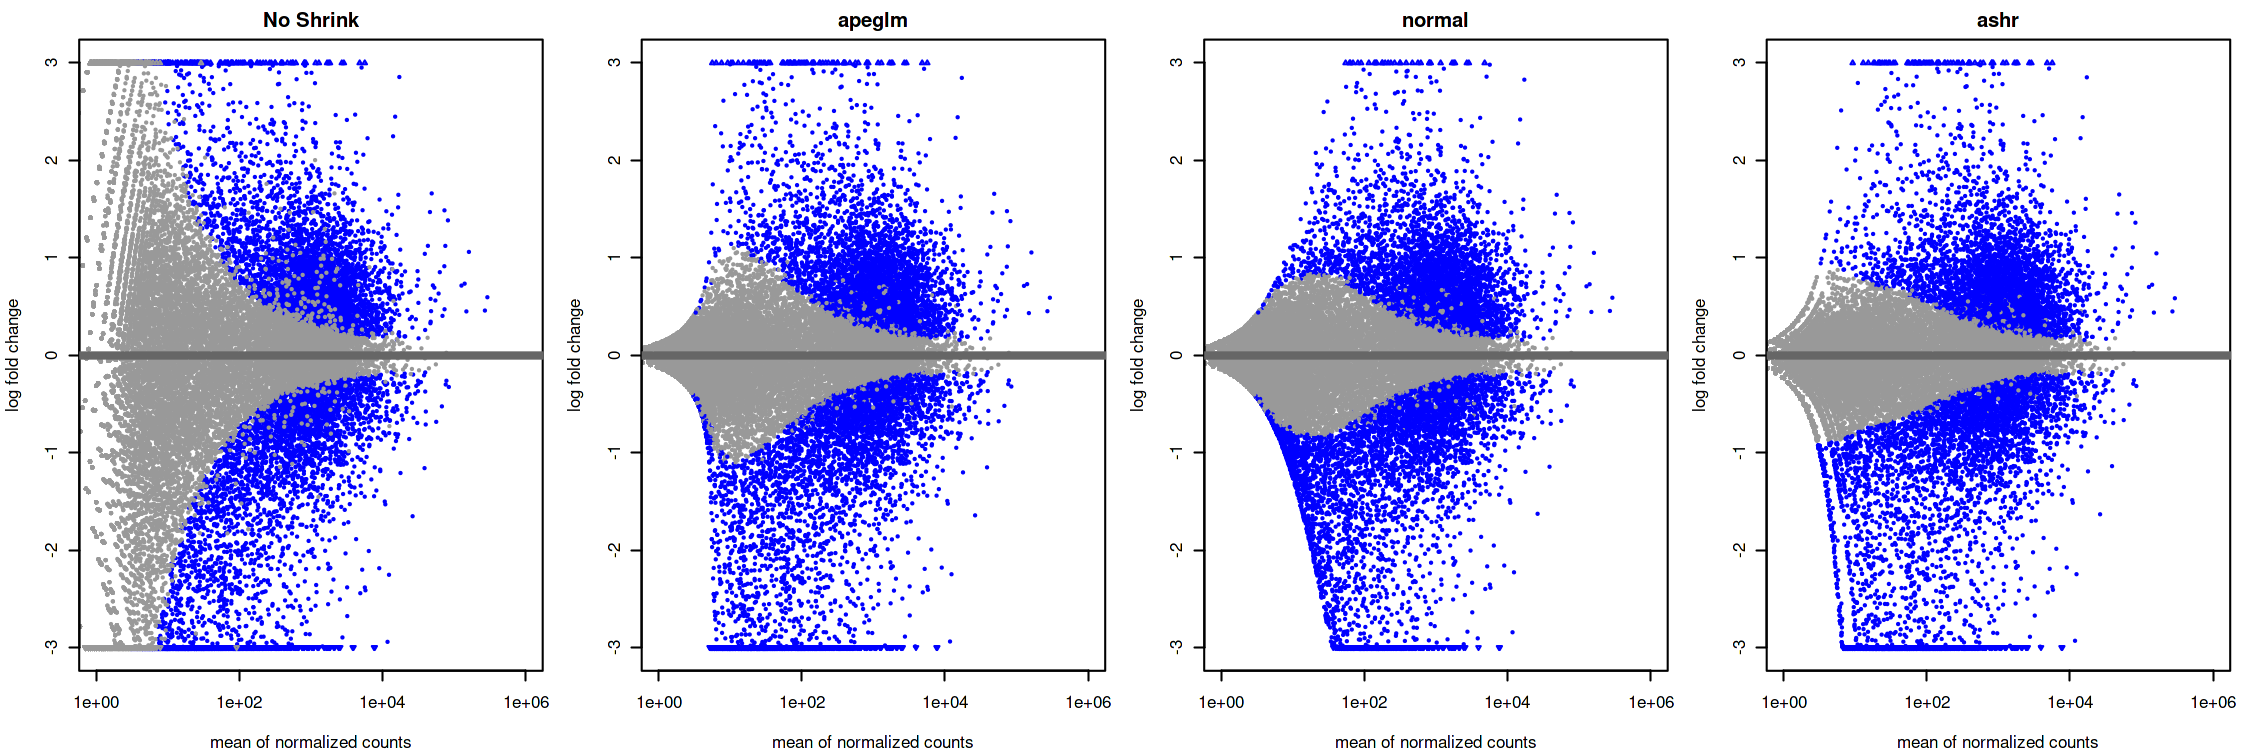

In [24]:
options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 150)

pltXLim = 10 ** ceiling(log10(max(counts(dds_24h, normalized=T))))
par(mfrow=c(1,4), mar=c(4,4,2,1))
xlim <- c(1,pltXLim); ylim <- c(-3,3)
plotMA(res_24h, xlim=xlim, ylim=ylim, main="No Shrink")
plotMA(resLFC_24h, xlim=xlim, ylim=ylim, main="apeglm")
plotMA(resNorm_24h, xlim=xlim, ylim=ylim, main="normal")
plotMA(resAsh_24h, xlim=xlim, ylim=ylim, main="ashr")

options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)

In [25]:
head(res_lfc_24h)

log2 fold change (MAP): group SUM159R 24h vs SUM159 24h 
Wald test p-value: group SUM159R 24h vs SUM159 24h 
DataFrame with 6 rows and 5 columns
                 baseMean log2FoldChange     lfcSE       pvalue         padj
                <numeric>      <numeric> <numeric>    <numeric>    <numeric>
ENSG00000168542   7623.80       -8.01821 0.1590666  0.00000e+00  0.00000e+00
ENSG00000254166   7798.00       -5.74974 0.1165984  0.00000e+00  0.00000e+00
ENSG00000196611   4798.88        4.00955 0.1011819  0.00000e+00  0.00000e+00
ENSG00000211448   3935.12       -7.20920 0.1654849  0.00000e+00  0.00000e+00
ENSG00000104368  17205.64        2.84687 0.0806986 1.03324e-274 4.61547e-271
ENSG00000134955   2884.91        4.37507 0.1265195 9.71242e-263 3.61545e-259

In [26]:
head(gencodeAnnot)

gene_stable_id  gene_name biotype       
1 ENSG00000000003 TSPAN6    protein_coding
2 ENSG00000000005 TNMD      protein_coding
3 ENSG00000000419 DPM1      protein_coding
4 ENSG00000000457 SCYL3     protein_coding
5 ENSG00000000460 C1orf112  protein_coding
6 ENSG00000000938 FGR       protein_coding

In [27]:
outres_24h = as.data.frame(res_lfc_24h[! is.na(res_lfc_24h$padj),])
outres_24h = merge(outres_24h, gencodeAnnot, by.x=0, by.y="gene_stable_id")

outres_24h = outres_24h[order(outres_24h$padj), ]

normExpr_24h = counts(dds_24h, normalized=T)
cn_24h = colnames(normExpr_24h)
normExpr2_24h = cbind(rownames(normExpr_24h), normExpr_24h)
colnames(normExpr2_24h) = c("Geneid", cn_24h)


write.table(outres_24h, file="../bulk_own/24h_sum159_vs_sum159_jq1r.tsv", row.names=F, quote=F, sep="\t")
write.table(normExpr2_24h, file="../bulk_own/normed_expr.24h_sum159_vs_sum159_jq1r.tsv", row.names=F, quote=F, sep="\t")

printres_24h = outres_24h[outres_24h$padj < 0.001, ]
write.table(printres_24h, file="../bulk_own/sig.24h_sum159_vs_sum159_jq1r.tsv", row.names=F, quote=F, sep="\t")

printres_24h.up = printres_24h[printres_24h$log2FoldChange > 1, ]
write.table(printres_24h.up , file="../bulk_own/sig.up.24h_sum159_vs_sum159_jq1r.tsv", row.names=F, quote=F, sep="\t")

printres_24h.down = printres_24h[printres_24h$log2FoldChange < -1, ]
write.table(printres_24h.down , file="../bulk_own/sig.down.24h_sum159_vs_sum159_jq1r.tsv", row.names=F, quote=F, sep="\t")



In [28]:
head(outres_24h)

Row.names       baseMean  log2FoldChange lfcSE      pvalue       
10002 ENSG00000168542  7623.801 -8.018207      0.15906657  0.000000e+00
12941 ENSG00000196611  4798.877  4.009554      0.10118186  0.000000e+00
13923 ENSG00000211448  3935.122 -7.209199      0.16548490  0.000000e+00
18508 ENSG00000254166  7797.995 -5.749736      0.11659844  0.000000e+00
2473  ENSG00000104368 17205.636  2.846869      0.08069864 1.033238e-274
5773  ENSG00000134955  2884.914  4.375074      0.12651954 9.712416e-263
      padj          gene_name biotype       
10002  0.000000e+00 COL3A1    protein_coding
12941  0.000000e+00 MMP1      protein_coding
13923  0.000000e+00 DIO2      protein_coding
18508  0.000000e+00 CASC19    lncRNA        
2473  4.615475e-271 PLAT      protein_coding
5773  3.615447e-259 SLC37A2   protein_coding

In [29]:
top24h.de = outres_24h[order(abs(outres_24h$log2FoldChange),decreasing=TRUE),]
top24h.de = top24h.de[top24h.de$padj < 0.05, ]

top24h.de.500.down = head(top24h.de[top24h.de$log2FoldChange < -1,], n=500)
top24h.de.500.up = head(top24h.de[top24h.de$log2FoldChange > 1,], n=500)

write.table(top24h.de.500.down , file="../bulk_own/top.down.24h_sum159_vs_sum159_jq1r.tsv", row.names=F, quote=F, sep="\t")
write.table(top24h.de.500.up , file="../bulk_own/top.up.24h_sum159_vs_sum159_jq1r.tsv", row.names=F, quote=F, sep="\t")

write.table(top24h.de , file="../bulk_own/top.all.24h_sum159_vs_sum159_jq1r.tsv", row.names=F, quote=F, sep="\t")


In [30]:
library(ggrepel)
library(EnhancedVolcano)


Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



In [31]:
head(outres_24h)

Row.names       baseMean  log2FoldChange lfcSE      pvalue       
10002 ENSG00000168542  7623.801 -8.018207      0.15906657  0.000000e+00
12941 ENSG00000196611  4798.877  4.009554      0.10118186  0.000000e+00
13923 ENSG00000211448  3935.122 -7.209199      0.16548490  0.000000e+00
18508 ENSG00000254166  7797.995 -5.749736      0.11659844  0.000000e+00
2473  ENSG00000104368 17205.636  2.846869      0.08069864 1.033238e-274
5773  ENSG00000134955  2884.914  4.375074      0.12651954 9.712416e-263
      padj          gene_name biotype       
10002  0.000000e+00 COL3A1    protein_coding
12941  0.000000e+00 MMP1      protein_coding
13923  0.000000e+00 DIO2      protein_coding
18508  0.000000e+00 CASC19    lncRNA        
2473  4.615475e-271 PLAT      protein_coding
5773  3.615447e-259 SLC37A2   protein_coding

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


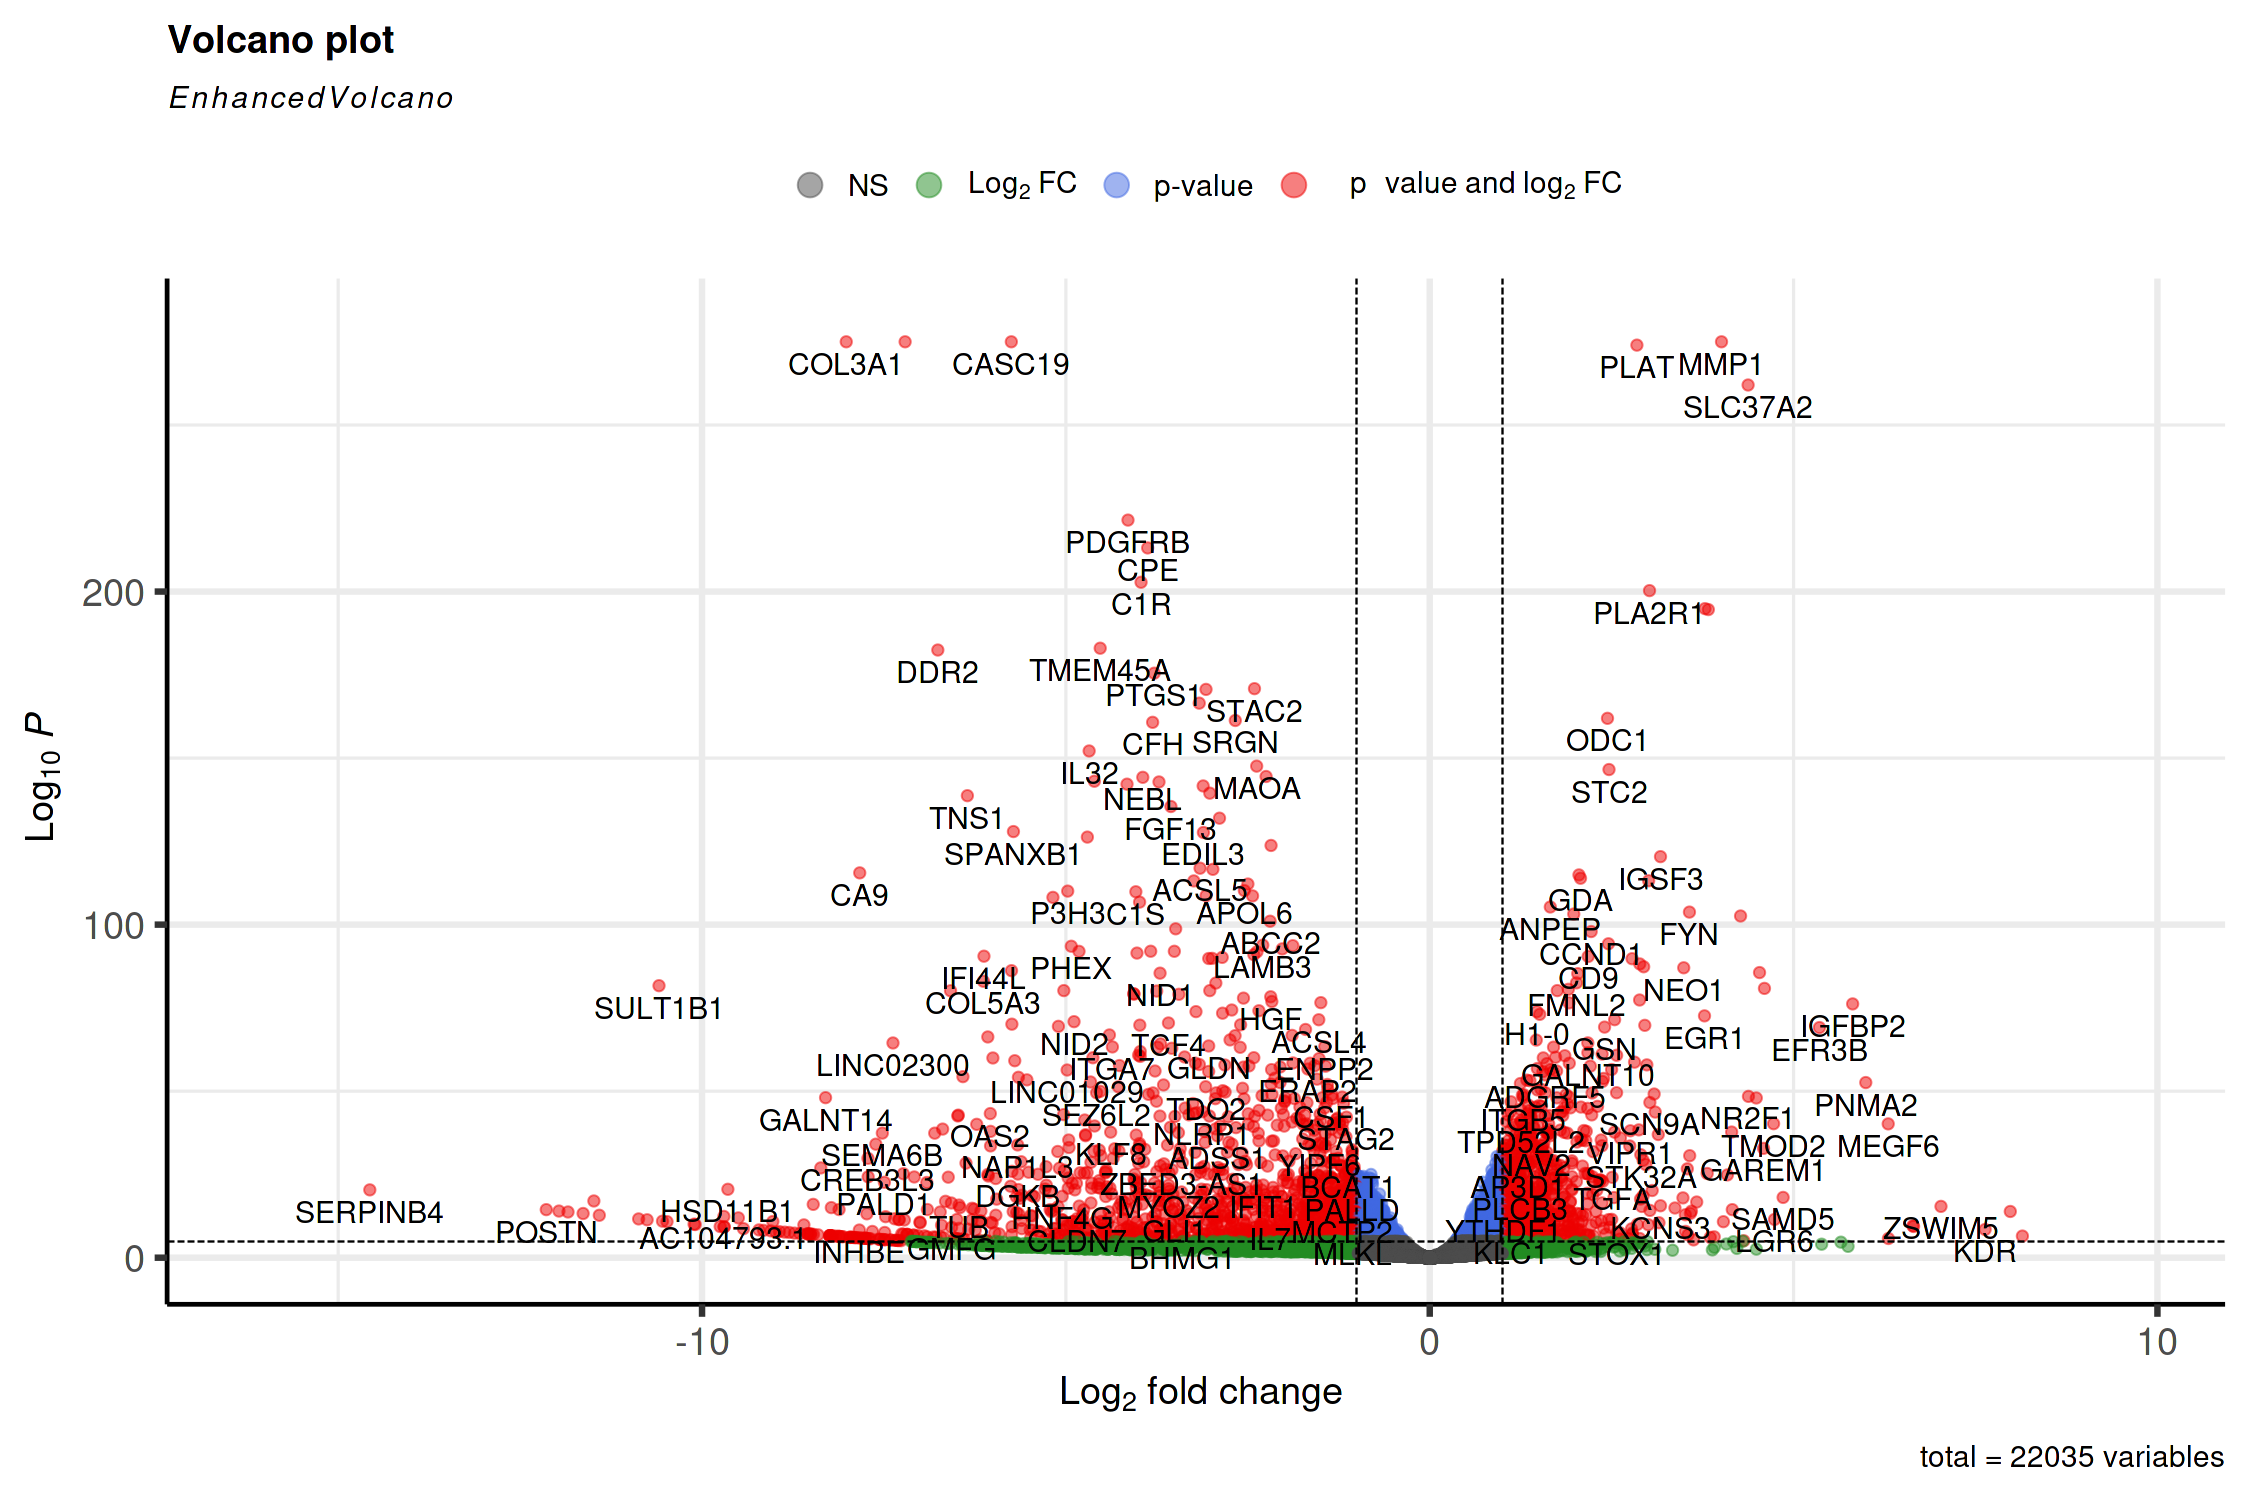

In [32]:
EnhancedVolcano(outres_24h,
    lab = outres_24h$gene_name,
    x = 'log2FoldChange',
    y = 'pvalue')

In [33]:
library(disgenet2r)

Sys.setenv(DISGENET_API_KEY= get_disgenet_api_key(email="joppich@bio.ifi.lmu.de", password="disgenetpassword"))

In [34]:
head(outres_24h$gene_name, n=100)

[1] "COL3A1"    "MMP1"      "DIO2"      "CASC19"    "PLAT"      "SLC37A2"  
  [7] "PDGFRB"    "CPE"       "C1R"       "PLA2R1"    "DUSP6"     "CADM1"    
 [13] "TMEM45A"   "DDR2"      "PTGS1"     "STAC2"     "CKAP4"     "F10"      
 [19] "ODC1"      "SRGN"      "CFH"       "IL32"      "MAOA"      "STC2"     
 [25] "TSC22D3"   "NEBL"      "COL12A1"   "IFITM1"    "PTGFR"     "PIR"      
 [31] "CASP1"     "TNS1"      "FGF13"     "C1QTNF1"   "SPANXB1"   "EDIL3"    
 [37] "GALNT15"   "GLUL"      "IGSF3"     "ACSL5"     "FBXO32"    "CA9"      
 [43] "SLC20A1"   "GDA"       "SESN3"     "GALNT5"    "DCN"       "APOL6"    
 [49] "P3H3"      "C1S"       "ALDOC"     "MAGED2"    "LOX"       "DEPP1"    
 [55] "ANPEP"     "FYN"       "SEMA3C"    "VSTM2L"    "ABCC2"     "SLC12A8"  
 [61] "CCND1"     "MYH10"     "LAMB3"     "IL13RA1"   "PHEX"      "PCLO"     
 [67] "ADGRG6"    "PRSS23"    "APOC1"     "NDRG1"     "COLEC12"   "MYBPC1"   
 [73] "IFI44L"    "CD9"       "APOL1"     "SELENOP"   "FMO3"      "MARCKSL1" 
 [79] "FOSL1"     "ITGB4"     "NEO1"      "MEG3"      "MIR3142HG" "NID1"     
 [85] "DNER"      "COL5A3"    "FMNL2"     "COL1A1"    "SULT1B1"   "KIF5C"    
 [91] "HTRA1"     "AMPH"      "NET1"      "TP53I11"   "CD36"      "UBA7"     
 [97] "HLA-DPA1"  "ANGPT1"    "MGP"       "HGF"

In [35]:
reft = read_csv("../dropbox/DESeq2_result_24h_ref_DEG_159Rup_top500.csv")
reft

Rows: 500 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): gene_id, gene_name, gene_type
dbl (6): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



gene_id            baseMean    log2FoldChange lfcSE     stat     
1   ENSG00000260549.1  291.151925  10.171600      2.1093961  4.822043
2   ENSG00000264982.1   34.131793   8.414557      1.5622785  5.386080
3   ENSG00000180730.4  137.048430   8.114576      1.0727406  7.564342
4   ENSG00000128052.8   69.362398   8.054347      1.3674691  5.889966
5   ENSG00000135063.13  20.774946   7.698341      1.6346229  4.709551
6   ENSG00000170323.4   61.854388   6.975156      1.1263019  6.192972
7   ENSG00000165495.11  63.288921   6.955761      1.1082293  6.276463
8   ENSG00000151812.10  10.542630   6.712591      1.8204144  3.687397
9   ENSG00000162415.6  118.667564   6.543956      0.7228743  9.052689
10  ENSG00000133985.2   20.834441   6.319726      1.5047321  4.199901
11  ENSG00000261452.1  111.983304   6.171700      0.6801060  9.074615
12  ENSG00000106025.4   18.493103   6.163970      1.5938374  3.867377
13  ENSG00000162591.11 671.516130   6.139475      0.7771689  7.899795
14  ENSG00000115457.5  611.530108   5.829385      0.3169794 18.390419
15  ENSG00000164690.3    5.552902   5.797273      2.0955729  2.766438
16  ENSG00000240694.4  353.085622   5.653294      0.3499970 16.152406
17  ENSG00000204866.4    4.561194   5.506485      2.2072366  2.494741
18  ENSG00000204876.4    4.539851   5.505379      2.2114304  2.489510
19  ENSG00000158966.9    4.357600   5.445431      2.2360437  2.435297
20  ENSG00000133067.13  54.383082   4.919726      0.7186413  6.845871
21  ENSG00000141441.11 212.024902   4.866952      0.3716326 13.096137
22  ENSG00000152315.4   23.512185   4.789058      1.0913354  4.388255
23  ENSG00000177614.5   23.244559   4.773070      1.0996307  4.340612
24  ENSG00000128872.5  215.625402   4.771643      0.3616854 13.192803
25  ENSG00000255082.1   68.026790   4.757613      0.6297186  7.555142
26  ENSG00000261787.1    6.663215   4.674001      1.8369494  2.544436
27  ENSG00000084710.9  190.433171   4.672704      0.3751151 12.456720
28  ENSG00000168280.12 460.625186   4.590172      0.2461678 18.646514
29  ENSG00000253522.2  575.237876   4.545188      0.2336111 19.456218
30  ENSG00000168959.10 126.984020   4.503466      0.4436383 10.151211
⋮   ⋮                  ⋮           ⋮              ⋮         ⋮        
471 ENSG00000175984.10   166.74622 1.628809       0.3099663  5.254795
472 ENSG00000259045.1     89.94696 1.627256       0.4420066  3.681519
473 ENSG00000227582.2    349.36757 1.625426       0.2436779  6.670389
474 ENSG00000148824.14   776.78122 1.625112       0.1598558 10.166111
475 ENSG00000142627.9   1816.06773 1.624612       0.1264909 12.843710
476 ENSG00000029153.10  1085.48237 1.624395       0.1328199 12.230056
477 ENSG00000125148.6  20933.72973 1.624364       0.1372098 11.838543
478 ENSG00000110427.10   290.50746 1.620223       0.2490562  6.505451
479 ENSG00000138166.5    523.32168 1.618798       0.1731530  9.348946
480 ENSG00000185483.7    589.25757 1.617440       0.1822508  8.874806
481 ENSG00000144485.6    115.90770 1.616593       0.5157747  3.134300
482 ENSG00000099814.11  1085.32381 1.614650       0.4733986  3.410763
483 ENSG00000162174.8     52.86968 1.613296       0.5712473  2.824164
484 ENSG00000105696.4     32.61987 1.612978       0.6463119  2.495665
485 ENSG00000254894.1    180.22736 1.612533       0.2855849  5.646422
486 ENSG00000136002.12   262.71918 1.611477       0.2357370  6.835908
487 ENSG00000227408.1     38.91539 1.611263       0.5685875  2.833800
488 ENSG00000148344.10   403.97916 1.611051       0.1962542  8.209000
489 ENSG00000115423.14   879.59841 1.610904       0.1467642 10.976133
490 ENSG00000161664.2     69.73082 1.610653       0.4904639  3.283938
491 ENSG00000122870.7     35.88968 1.607624       0.6093822  2.638121
492 ENSG00000185112.4    158.42146 1.607379       0.4143780  3.879016
493 ENSG00000215873.2     50.49498 1.605038       0.5193870  3.090255
494 ENSG00000104067.12  3210.24095 1.604333       0.1037427 15.464540
495 ENSG00000131979.14   339.70981 1.602029       0.2074633  7.721985
496 ENSG000002

In [36]:
reft2 = reft[!is.na(reft$padj)& reft$gene_type=="protein_coding",]
reft2 = reft2[order(reft2$padj),]
reft2

gene_id            baseMean    log2FoldChange lfcSE      stat    
1   ENSG00000196611.4    5604.9672 4.014489       0.10270374 39.08805
2   ENSG00000104368.13  17243.3684 2.842772       0.08181778 34.74517
3   ENSG00000134955.7    2570.6545 4.393226       0.14081036 31.19959
4   ENSG00000182985.12   1773.9134 3.824381       0.13143895 29.09625
5   ENSG00000139318.7    2269.3883 3.691746       0.12783991 28.87788
6   ENSG00000153246.7    5217.6795 2.992883       0.10641633 28.12428
7   ENSG00000115758.8   15043.8458 2.431410       0.09466253 25.68503
8   ENSG00000113739.6    4157.5914 2.452701       0.09606075 25.53281
9   ENSG00000143061.13   1955.2597 3.129014       0.12819548 24.40815
10  ENSG00000167995.11 157194.1130 2.004811       0.08675533 23.10879
11  ENSG00000149212.6    1290.2711 2.992203       0.13429711 22.28047
12  ENSG00000119125.12   4273.2765 2.057627       0.09243263 22.26082
13  ENSG00000144136.6    5402.9232 2.045315       0.09256058 22.09705
14  ENSG00000132821.7    2695.9784 4.271365       0.19903562 21.46030
15  ENSG00000010810.13    818.8736 3.589322       0.16770256 21.40291
16  ENSG00000166825.9   48775.2656 1.648471       0.07747501 21.27746
17  ENSG00000075223.9    4447.4396 1.972471       0.09433579 20.90904
18  ENSG00000175592.4    1152.2251 2.909938       0.14031493 20.73862
19  ENSG00000110092.3    6920.0727 2.211899       0.10800764 20.47910
20  ENSG00000175130.6    1170.4138 2.810255       0.13901142 20.21600
21  ENSG00000133026.8    2215.3904 2.513246       0.12536492 20.04744
22  ENSG00000132470.9    5104.3896 2.938853       0.14774236 19.89174
23  ENSG00000010278.7    2218.3494 2.172208       0.11065644 19.63020
24  ENSG00000187957.7    2453.1378 2.035230       0.10488437 19.40452
25  ENSG00000067141.12    845.0078 3.489876       0.18176353 19.20009
26  ENSG00000157827.15   3041.8560 2.040952       0.10888620 18.74390
27  ENSG00000166033.7    3230.9698 1.904103       0.10165438 18.73115
28  ENSG00000168280.12    460.6252 4.590172       0.24616782 18.64651
29  ENSG00000173848.14   3999.7275 1.745615       0.09430514 18.51029
30  ENSG00000136231.9     519.4220 3.929810       0.21231510 18.50933
⋮   ⋮                  ⋮           ⋮              ⋮          ⋮       
345 ENSG00000163508.8  13.765403   3.013977       1.0584035  2.847663
346 ENSG00000130940.10 35.319554   2.030708       0.7155426  2.837997
347 ENSG00000178172.2  31.030690   1.802535       0.6377679  2.826318
348 ENSG00000162174.8  52.869681   1.613296       0.5712473  2.824164
349 ENSG00000084674.9  11.064186   3.371934       1.2166102  2.771581
350 ENSG00000180834.3  21.779637   2.294719       0.8289724  2.768149
351 ENSG00000164690.3   5.552902   5.797273       2.0955729  2.766438
352 ENSG00000214597.4  30.613468   1.928021       0.6972490  2.765183
353 ENSG00000101977.15 13.542871   3.073690       1.1309696  2.717748
354 ENSG00000119514.5  16.448176   2.579599       0.9673962  2.666538
355 ENSG00000165072.9  23.643663   1.989784       0.7481160  2.659726
356 ENSG00000122870.7  35.889678   1.607624       0.6093822  2.638121
357 ENSG00000174721.9  30.758528   1.740266       0.6601373  2.636219
358 ENSG00000149564.7   8.138030   4.108863       1.6098816  2.552276
359 ENSG00000173157.12 30.578961   1.684654       0.6606138  2.550134
360 ENSG00000156298.8  32.091481   1.757509       0.6904299  2.545529
361 ENSG00000261787.1   6.663215   4.674001       1.8369494  2.544436
362 ENSG00000140835.8  10.595756   3.112593       1.2321052  2.526239
363 ENSG00000105696.4  32.619872   1.612978       0.6463119  2.495665
364 ENSG00000204866.4   4.561194   5.506485       2.2072366  2.494741
365 ENSG00000204876.4   4.539851   5.505379       2.2114304  2.489510
366 ENSG00000165716.5  18.387182   2.294321       0.9335034  2.457753
367 ENSG00000137460.4  27.032096   1.757192       0.7173437  2.449582
368 ENSG00000158966.9   4.357600   5.445431       2.2360437  2.435297
369 ENSG00000142279.8  16.105316   2.191365       0.9072135  2.415489
370 ENSG000001

In [37]:
head(top24h.de.500.up, n=10)

Row.names       baseMean   log2FoldChange lfcSE     pvalue      
5789  ENSG00000135063   26.92319 8.144262       2.7517848 3.211845e-07
11647 ENSG00000180730  148.30822 7.978104       1.0020315 1.329740e-14
4981  ENSG00000128052   69.30985 7.632185       1.3357160 3.398569e-09
8755  ENSG00000162415  115.36766 7.025549       0.8613641 3.956149e-16
10282 ENSG00000170323   62.07780 6.649204       1.0468908 4.255381e-10
9413  ENSG00000165495   63.51610 6.638711       1.0462773 2.539789e-10
21807 ENSG00000286772   30.34291 6.303369       1.4111790 1.744427e-06
8782  ENSG00000162591 1162.50700 6.300360       0.4745328 6.677503e-41
17320 ENSG00000240694  316.10793 5.992169       0.3915468 2.608015e-53
3741  ENSG00000115457  614.05466 5.811589       0.3136726 6.382644e-77
      padj         gene_name  biotype       
5789  2.207517e-06 FAM189A2   protein_coding
11647 2.005384e-13 SHISA2     protein_coding
4981  3.037497e-08 KDR        protein_coding
8755  6.854973e-15 ZSWIM5     protein_coding
10282 4.190650e-09 FABP4      protein_coding
9413  2.555234e-09 PKNOX2     protein_coding
21807 1.069791e-05 AC009410.1 lncRNA        
8782  4.773180e-39 MEGF6      protein_coding
17320 2.971940e-51 PNMA2      protein_coding
3741  1.344871e-74 IGFBP2     protein_coding

In [38]:
head(top24h.de.500.up$gene_name	, n=100)

[1] "FAM189A2"        "SHISA2"          "KDR"             "ZSWIM5"         
  [5] "FABP4"           "PKNOX2"          "AC009410.1"      "MEGF6"          
  [9] "PNMA2"           "IGFBP2"          "SLC35F4"         "TTC9"           
 [13] "TSPAN12"         "EFR3B"           "SAMD5"           "LGR6"           
 [17] "TMOD2"           "KIF5C"           "GAREM1"          "MIR3142HG"      
 [21] "SHH"             "CTSV"            "NR2F1"           "SLC37A2"        
 [25] "PGBD5"           "ADAMTS7P1"       "VSTM2L"          "MT-TE"          
 [29] "KCNK13"          "AREG"            "IGF2BP3"         "TNFRSF21"       
 [33] "AL023775.1"      "GRM5"            "MMP1"            "AC246817.2"     
 [37] "APBA1"           "CLDN11"          "RHBDL3"          "CADM1"          
 [41] "CHGB"            "DUSP6"           "EGR1"            "SNAP25"         
 [45] "BEST2"           "TMEM47"          "FAM184A"         "TRIM36"         
 [49] "FYN"             "LZTS1"           "GJA3"            "ARMH4"          
 [53] "CXCL1"           "NEO1"            "GLI2"            "TLE4"           
 [57] "AL732437.3"      "IGSF3"           "KCNS3"           "DHRS2"          
 [61] "SORBS1"          "PMEPA1"          "AC021218.1"      "RETREG1"        
 [65] "PRKG1"           "NPTXR"           "SCN9A"           "PLA2R1"         
 [69] "SESN3"           "FCAR"            "MAP7"            "KIR3DL2"        
 [73] "PLXNA2"          "FOXC2"           "GJB3"            "KLF5"           
 [77] "ITGB4"           "ARHGAP44"        "DPF3"            "ZNF704"         
 [81] "CHST2"           "STK32A"          "MARK1"           "FOSL1"          
 [85] "IGFL4"           "CHST15"          "ALDH5A1"         "SUGT1P4-STRA6LP"
 [89] "PLAT"            "LINC01315"       "ZDHHC2"          "LINC00355"      
 [93] "FOXP2"           "AC068338.2"      "CALB2"           "ADAMTS7"        
 [97] "MARCKSL1"        "FTH1P5"          "TMEM178B"        "VIPR1"

In [39]:
input_genes = head(top24h.de.500.up$gene_name, n=500)

print(input_genes)

disgenet_input <- gene2disease( gene = input_genes, vocabulary = "HGNC", database = "ALL")

common_genes = intersect(disgenet_input@qresult$gene_symbol, input_genes)

print(paste("Remaining Gene Count: ", length(common_genes), "of", length(input_genes)))

res_enrich <-disease_enrichment( entities =common_genes, vocabulary = "HGNC", database = "ALL")



  [1] "FAM189A2"        "SHISA2"          "KDR"             "ZSWIM5"         
  [5] "FABP4"           "PKNOX2"          "AC009410.1"      "MEGF6"          
  [9] "PNMA2"           "IGFBP2"          "SLC35F4"         "TTC9"           
 [13] "TSPAN12"         "EFR3B"           "SAMD5"           "LGR6"           
 [17] "TMOD2"           "KIF5C"           "GAREM1"          "MIR3142HG"      
 [21] "SHH"             "CTSV"            "NR2F1"           "SLC37A2"        
 [25] "PGBD5"           "ADAMTS7P1"       "VSTM2L"          "MT-TE"          
 [29] "KCNK13"          "AREG"            "IGF2BP3"         "TNFRSF21"       
 [33] "AL023775.1"      "GRM5"            "MMP1"            "AC246817.2"     
 [37] "APBA1"           "CLDN11"          "RHBDL3"          "CADM1"          
 [41] "CHGB"            "DUSP6"           "EGR1"            "SNAP25"         
 [45] "BEST2"           "TMEM47"          "FAM184A"         "TRIM36"         
 [49] "FYN"             "LZTS1"           "GJA3"            "ARM

Warning message in gene2disease(gene = input_genes, vocabulary = "HGNC", database = "ALL"):
“
 One or more of the genes in the list is not in DisGeNET ( 'ALL' ):
   - AC009410.1
   - ADAMTS7P1
   - MT-TE
   - AL023775.1
   - AC246817.2
   - AL732437.3
   - AC021218.1
   - SUGT1P4-STRA6LP
   - AC068338.2
   - FTH1P5
   - IGFL1P1
   - LINC01202
   - FTH1P16
   - FTH1P23
   - GPR137C
   - FTH1P7
   - LINC00317
   - FTH1P2
   - AC008443.2
   - CCDC183-AS1
   - VIPR1-AS1
   - AL390066.2
   - AC063952.1
   - IZUMO4
   - CYSRT1
   - CD24P4
   - AC027228.2
   - AC024909.1
   - BTBD6
   - AF235103.3
   - AL162717.1
   - AL161431.1
   - SAYSD1
   - GSN-AS1
   - AL512791.1
   - AL928654.4
   - FTH1P8
   - AC096921.2
   - LINC01291
   - AL049840.6
   - AC008760.2
   - LINC01711
   - ZNF782
   - AL359715.3
   - C12orf56
   - AP000866.2
   - APCDD1L
   - ADCK5
   - FTH1P1
   - AC138028.4
   - HERC2P2
   - AL391988.1
   - FTH1P4
   - HNRNPH1P3
   - HERC2P3
   - ATP6V0E2
   - DENND2C
   - ABBA01000935

[1] "Remaining Gene Count:  424 of 500"


In [40]:
res_enrich@qresult[ res_enrich@qresult$FDR < 0.0001, c('ID','Description','source','Ratio','BgRatio','pvalue','FDR')]

ID       Description                                source Ratio  
373  C0009402 Colorectal Carcinoma                       ALL    165/424
2247 C0178874 Tumor Progression                          ALL    128/424
4343 C0686619 Secondary malignant neoplasm of lymph node ALL    101/424
6593 C2939419 Secondary Neoplasm                         ALL    90/424 
1445 C0033578 Prostatic Neoplasms                        ALL    69/424 
3706 C0376358 Malignant neoplasm of prostate             ALL    138/424
5421 C1458155 Mammary Neoplasms                          ALL    96/424 
1551 C0036341 Schizophrenia                              ALL    98/424 
4288 C0600139 Prostate carcinoma                         ALL    134/424
6325 C2239176 Liver carcinoma                            ALL    164/424
6586 C2938924 Oestrogen receptor positive breast cancer  ALL    31/424 
2729 C0242379 Malignant neoplasm of lung                 ALL    128/424
255  C0007097 Carcinoma                                  ALL    86/424 
3230 C0279626 Squamous cell carcinoma of esophagus       ALL    75/424 
5180 C1306460 Primary malignant neoplasm of lung         ALL    120/424
4870 C0919267 ovarian neoplasm                           ALL    87/424 
26   C0001418 Adenocarcinoma                             ALL    79/424 
257  C0007103 Malignant neoplasm of endometrium          ALL    52/424 
1045 C0024121 Lung Neoplasms                             ALL    59/424 
     BgRatio    pvalue       FDR         
373  5473/21666 5.346205e-10 2.049735e-06
2247 3865/21666 3.904144e-10 2.049735e-06
4343 2825/21666 9.763622e-10 2.495582e-06
6593 2492/21666 6.356075e-09 1.218459e-05
1445 1722/21666 9.714469e-09 1.440937e-05
3706 4502/21666 1.127494e-08 1.440937e-05
5421 2780/21666 1.682902e-08 1.843499e-05
1551 2872/21666 2.084294e-08 1.997796e-05
4288 4388/21666 2.623150e-08 2.141940e-05
6325 5725/21666 3.072684e-08 2.141940e-05
6586 510/21666  2.989114e-08 2.141940e-05
2729 4173/21666 4.860294e-08 3.105728e-05
255  2462/21666 6.860906e-08 4.046879e-05
3230 2053/21666 9.637174e-08 5.278418e-05
5180 3894/21666 1.197581e-07 6.122033e-05
4870 2542/21666 1.407022e-07 6.743155e-05
26   2235/21666 1.628121e-07 7.309775e-05
257  1235/21666 1.754802e-07 7.309775e-05
1045 1486/21666 1.811238e-07 7.309775e-05

[1] "warning: dataframe of 50 rows has been reduced to 50 rows."


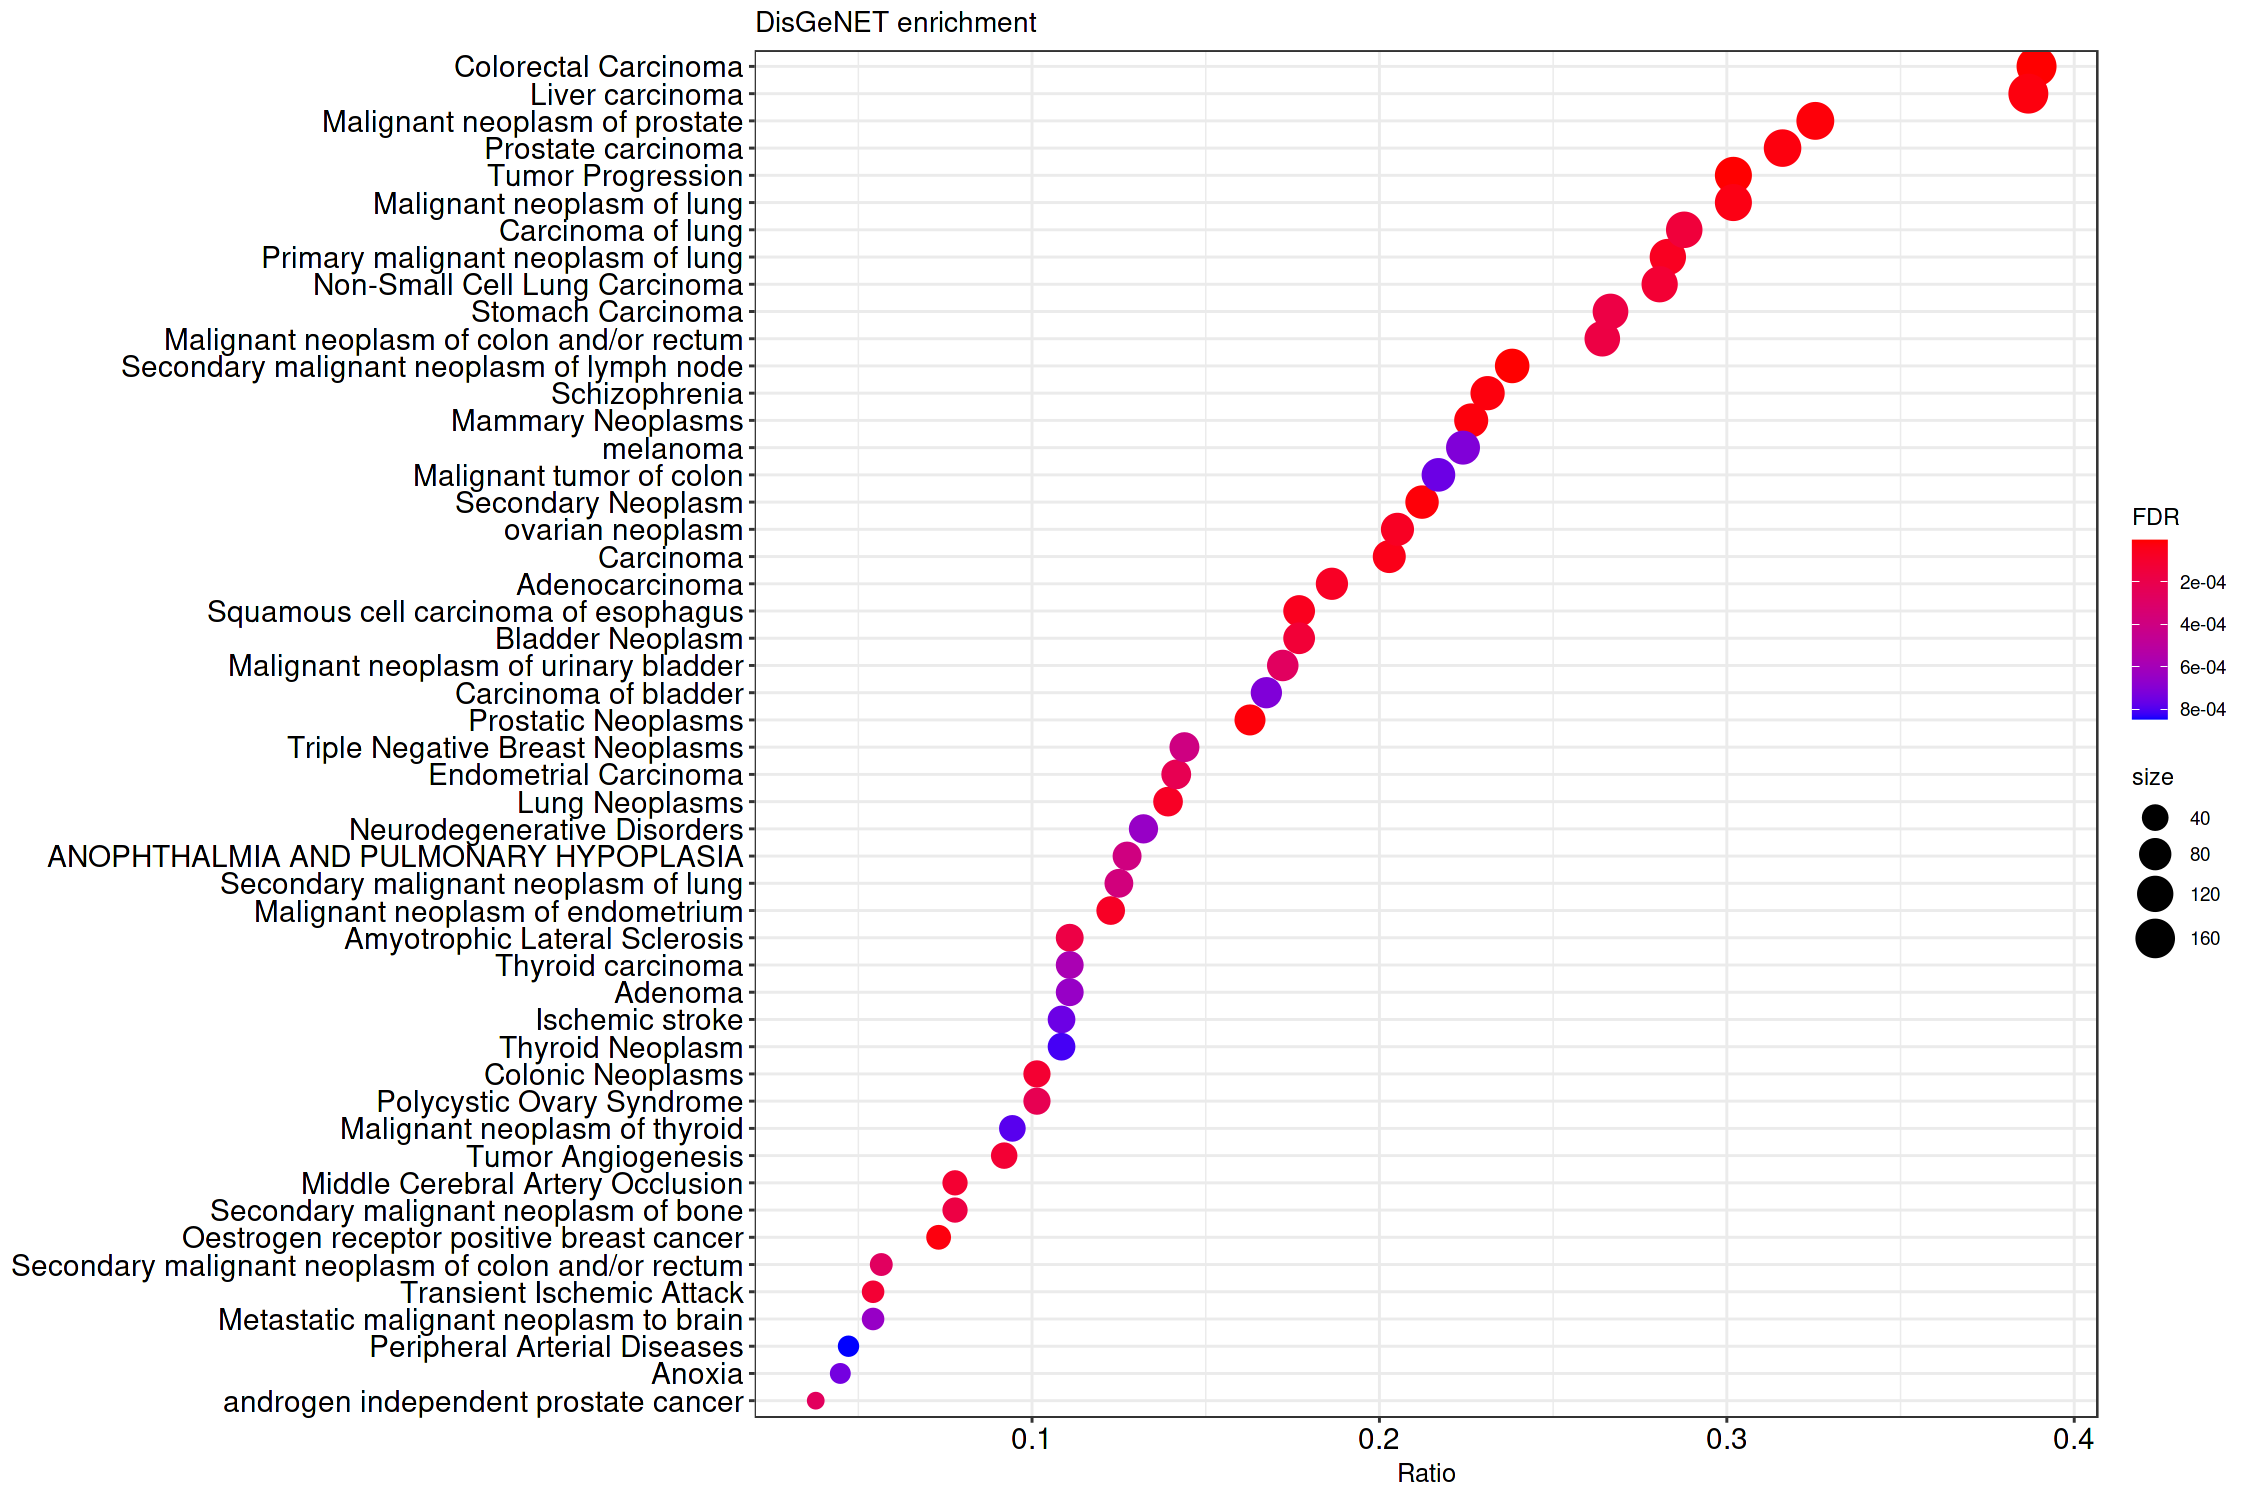

In [41]:
plot( res_enrich, class = "Enrichment",  cutoff= 0.05, nchars=70)

In [42]:
library(clusterProfiler)
library(DOSE)
library(enrichplot)
library(org.Hs.eg.db)



clusterProfiler v3.18.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter


DOSE v3.16.0  For help: https://guangchuangyu.github.io/software/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609




In [43]:
head(outres_24h)

Row.names       baseMean  log2FoldChange lfcSE      pvalue       
10002 ENSG00000168542  7623.801 -8.018207      0.15906657  0.000000e+00
12941 ENSG00000196611  4798.877  4.009554      0.10118186  0.000000e+00
13923 ENSG00000211448  3935.122 -7.209199      0.16548490  0.000000e+00
18508 ENSG00000254166  7797.995 -5.749736      0.11659844  0.000000e+00
2473  ENSG00000104368 17205.636  2.846869      0.08069864 1.033238e-274
5773  ENSG00000134955  2884.914  4.375074      0.12651954 9.712416e-263
      padj          gene_name biotype       
10002  0.000000e+00 COL3A1    protein_coding
12941  0.000000e+00 MMP1      protein_coding
13923  0.000000e+00 DIO2      protein_coding
18508  0.000000e+00 CASC19    lncRNA        
2473  4.615475e-271 PLAT      protein_coding
5773  3.615447e-259 SLC37A2   protein_coding

In [44]:
sel_df = outres_24h[outres_24h$log2FoldChange > 1,]

nsamples=1500
geneList = head(sel_df$log2FoldChange, n=nsamples)
names(geneList) = head(sel_df$gene_name, n=nsamples)
names(geneList) = mapIds(org.Hs.eg.db, head(sel_df$gene_name, n=nsamples), 'ENTREZID', 'SYMBOL')
geneList = geneList[!is.na(names(geneList))]

geneList = geneList[order(geneList, decreasing = TRUE)]
head(geneList)

'select()' returned 1:1 mapping between keys and columns



9413   387914     3791    57643     2167    63876 
8.144262 7.978104 7.632185 7.025549 6.649204 6.638711

In [45]:
dgnGSE <- gseDGN(geneList,
              pvalueCutoff  = 0.5,
              pAdjustMethod = "BH")
dgnGSE <- setReadable(dgnGSE, 'org.Hs.eg.db')


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
leading edge analysis...

done...



In [46]:
print(dim(dgnGSE@result[dgnGSE@result$p.adjust < 0.05,]))
head(dgnGSE@result[dgnGSE@result$p.adjust < 0.05,])

[1]  2 11


ID       Description                               setSize
C2938924 C2938924 Oestrogen receptor positive breast cancer 49     
C0027796 C0027796 Neuralgia                                 48     
         enrichmentScore NES      pvalue       p.adjust   qvalues    rank
C2938924 0.5060408       2.211433 9.761166e-06 0.01382181 0.01178532 319 
C0027796 0.5042707       2.198248 2.010912e-05 0.01423726 0.01213956 183 
         leading_edge                  
C2938924 tags=61%, list=28%, signal=46%
C0027796 tags=44%, list=16%, signal=38%
         core_enrichment                                                                                                                                                          
C2938924 KDR/LGR6/AREG/MMP1/FYN/GLI2/KLF5/FOSL1/STC2/GSN/CD24/FOXA1/TRPM2/CCND1/SLC20A1/DNER/BCL2/TRIM29/MAPT/ADAMTS2/UBASH3B/EREG/RAB27B/E2F7/PAG1/CXCL8/CHKA/SEMA4D/MAP4K4/EPHB2
C0027796 KDR/LGR6/KCNK13/GRM5/DUSP6/SNAP25/CXCL1/NEO1/GLI2/PRKG1/SCN9A/KLF5/CALB2/MCC/ODC1/EDN1/ADORA1/TNFRSF1B/TRPM2/AKT3/ELAVL2

In [47]:
dgnEnrich <- enrichDGN(names(geneList),
              pvalueCutoff  = 0.5,
              pAdjustMethod = "BH")
dgnEnrich <- setReadable(dgnEnrich, 'org.Hs.eg.db')
head(dgnEnrich@result, n=20)

ID       Description                              GeneRatio BgRatio  
C0334579 C0334579 Anaplastic astrocytoma                   30/1004   202/21671
C0024668 C0024668 Mammary Neoplasms, Experimental          29/1004   218/21671
C3642347 C3642347 Basal-Like Breast Carcinoma              31/1004   245/21671
C1704436 C1704436 Peripheral Arterial Diseases             36/1004   319/21671
C0205698 C0205698 Undifferentiated carcinoma               33/1004   283/21671
C1368683 C1368683 Epithelioma                              36/1004   326/21671
C1861305 C1861305 TARSAL-CARPAL COALITION SYNDROME         31/1004   261/21671
C0008479 C0008479 Chondrosarcoma                           40/1004   385/21671
C4721779 C4721779 Ovarian cancer stage IV                  12/1004   51/21671 
C0016057 C0016057 Fibrosarcoma                             41/1004   413/21671
C0346629 C0346629 Malignant neoplasm of large intestine    23/1004   173/21671
C0220650 C0220650 Metastatic malignant neoplasm to brain   39/1004   392/21671
C3888194 C3888194 MIXED LINEAGE LEUKEMIA                   28/1004   240/21671
C0279628 C0279628 Adenocarcinoma Of Esophagus              44/1004   468/21671
C4722099 C4722099 High grade glioma                        24/1004   190/21671
C1837315 C1837315 COLORECTAL CANCER, SUSCEPTIBILITY TO, 1  22/1004   166/21671
C0205875 C0205875 Papillomatosis                           7/1004    18/21671 
C0280313 C0280313 Squamous cell carcinoma of oropharynx    21/1004   155/21671
C4733092 C4733092 estrogen receptor-negative breast cancer 36/1004   356/21671
C0205696 C0205696 Anaplastic carcinoma                     27/1004   232/21671
         pvalue       p.adjust     qvalue      
C0334579 1.674029e-08 0.0001205133 0.0001050409
C0024668 3.266388e-07 0.0009591549 0.0008360112
C3642347 3.997034e-07 0.0009591549 0.0008360112
C1704436 8.135334e-07 0.0014641568 0.0012761771
C0205698 1.118004e-06 0.0015372599 0.0013398946
C1368683 1.363106e-06 0.0015372599 0.0013398946
C1861305 1.585937e-06 0.0015372599 0.0013398946
C0008479 1.708304e-06 0.0015372599 0.0013398946
C4721779 2.725143e-06 0.0021798113 0.0018999503
C0016057 4.004324e-06 0.0028827131 0.0025126082
C0346629 5.326239e-06 0.0034857814 0.0030382499
C0220650 6.500291e-06 0.0037793513 0.0032941290
C3888194 7.055857e-06 0.0037793513 0.0032941290
C0279628 7.349759e-06 0.0037793513 0.0032941290
C4722099 8.191393e-06 0.0038519423 0.0033574002
C1837315 8.916846e-06 0.0038519423 0.0033574002
C0205875 9.106356e-06 0.0038519423 0.0033574002
C0280313 1.003747e-05 0.0038519423 0.0033574002
C4733092 1.019278e-05 0.0038519423 0.0033574002
C0205696 1.070133e-05 0.0038519423 0.0033574002
         geneID                                                                                                                                                                                                                                                 
C0334579 IGFBP2/AREG/MARCKSL1/CCN2/CCND1/DUSP4/SLC20A1/BCL2/CXCL8/RB1/CD70/ADGRE2/ABR/SERPINE1/PDPN/FGFR1/RTEL1/PEA15/F3/PLAU/FOXM1/KIAA1549/KLF6/PIEZO1/AR/MTSS1/EGFR/KIFC1/MET/PODXL                                                                          
C0024668 KDR/FABP4/AREG/DUSP6/TLE4/TGFA/STC2/GSN/CCND1/GDA/UCP2/BCL2/RB1/CCNE1/SLC12A2/FN1/SGK1/ACTB/BCL2L1/CAD/PLAU/KRT7/HRAS/TYMS/SLC25A10/AR/PDGFA/EGFR/CDS1                                                                                                 
C3642347 FOXC2/KLF5/CD24/FOXA1/CLDN1/ELAVL2/DUSP4/BCL2/CXCL8/BCAR1/MAP4K4/PTX3/EPHB2/ROR1/DUSP5/KLF12/FN1/INPP4B/PDPN/ACTB/PI3/MELK/DNMT1/PLAU/FOXM1/MYBL2/GLS/CIP2A/ITGA6/EGFR/MET                                                                             
C1704436 KDR/FABP4/SHH/ADAMTS7/EDN1/TNFRSF1B/APOB/CCND1/BCL2/CXCL8/TLR2/PTX3/EPHB2/DUSP5/GCH1/NT5E/SRD5A1/ADI1/FN1/ATP7B/CDKN1A/FOS/MYB/PLA2G15/CAD/F3/MCAM/BLM/IL18/SH2B3/GPX4/RAP2A/MARK2/OSBPL10/AR/PODXL                                                    
C0205698 FABP4/CADM1/DUSP6/EGR1/TLE4/FOSL1/GPLD1/TP53I3/C

In [48]:
print(dim(dgnEnrich@result[dgnEnrich@result$p.adjust < 0.05,]))
head(dgnEnrich@result[dgnEnrich@result$p.adjust < 0.05,])

[1] 160   9


ID       Description                     GeneRatio BgRatio  
C0334579 C0334579 Anaplastic astrocytoma          30/1004   202/21671
C0024668 C0024668 Mammary Neoplasms, Experimental 29/1004   218/21671
C3642347 C3642347 Basal-Like Breast Carcinoma     31/1004   245/21671
C1704436 C1704436 Peripheral Arterial Diseases    36/1004   319/21671
C0205698 C0205698 Undifferentiated carcinoma      33/1004   283/21671
C1368683 C1368683 Epithelioma                     36/1004   326/21671
         pvalue       p.adjust     qvalue      
C0334579 1.674029e-08 0.0001205133 0.0001050409
C0024668 3.266388e-07 0.0009591549 0.0008360112
C3642347 3.997034e-07 0.0009591549 0.0008360112
C1704436 8.135334e-07 0.0014641568 0.0012761771
C0205698 1.118004e-06 0.0015372599 0.0013398946
C1368683 1.363106e-06 0.0015372599 0.0013398946
         geneID                                                                                                                                                                                                
C0334579 IGFBP2/AREG/MARCKSL1/CCN2/CCND1/DUSP4/SLC20A1/BCL2/CXCL8/RB1/CD70/ADGRE2/ABR/SERPINE1/PDPN/FGFR1/RTEL1/PEA15/F3/PLAU/FOXM1/KIAA1549/KLF6/PIEZO1/AR/MTSS1/EGFR/KIFC1/MET/PODXL                         
C0024668 KDR/FABP4/AREG/DUSP6/TLE4/TGFA/STC2/GSN/CCND1/GDA/UCP2/BCL2/RB1/CCNE1/SLC12A2/FN1/SGK1/ACTB/BCL2L1/CAD/PLAU/KRT7/HRAS/TYMS/SLC25A10/AR/PDGFA/EGFR/CDS1                                                
C3642347 FOXC2/KLF5/CD24/FOXA1/CLDN1/ELAVL2/DUSP4/BCL2/CXCL8/BCAR1/MAP4K4/PTX3/EPHB2/ROR1/DUSP5/KLF12/FN1/INPP4B/PDPN/ACTB/PI3/MELK/DNMT1/PLAU/FOXM1/MYBL2/GLS/CIP2A/ITGA6/EGFR/MET                            
C1704436 KDR/FABP4/SHH/ADAMTS7/EDN1/TNFRSF1B/APOB/CCND1/BCL2/CXCL8/TLR2/PTX3/EPHB2/DUSP5/GCH1/NT5E/SRD5A1/ADI1/FN1/ATP7B/CDKN1A/FOS/MYB/PLA2G15/CAD/F3/MCAM/BLM/IL18/SH2B3/GPX4/RAP2A/MARK2/OSBPL10/AR/PODXL   
C0205698 FABP4/CADM1/DUSP6/EGR1/TLE4/FOSL1/GPLD1/TP53I3/CCND1/GDA/UCP2/BCL2/RB1/ADGRE2/SLC12A2/FN1/ATP7B/SGK1/CDKN1A/ACTB/CORO1A/PDLIM7/BCL2L1/DNMT1/CIRBP/IL18/HRAS/TYMS/SLC25A10/PDGFA/EGFR/CDS1/MET         
C1368683 LGR6/CTSV/ODC1/SEMA3C/BCL2/TRIM29/CXCL8/FBLN1/HPGD/BIRC3/ROR1/CD70/FN1/SGK1/PDPN/CDKN1A/ACTB/BCL2L11/MYB/RTEL1/PDLIM7/RUNX1/MEIS1/F3/CXADR/PLAU/DIAPH3/CDK2AP2/HRAS/TYMS/EPHB4/AR/PDGFA/EGFR/MET/RIPK1
         Count
C0334579 30   
C0024668 29   
C3642347 31   
C1704436 36   
C0205698 33   
C1368683 36

In [56]:
metascapeHits = c("AREG","CCND1","BCL2","KLF5","CHKA","EPHB2","EREG","FYN",
"GLI2","GSN","FOXA1","CXCL8","KDR","MAPT","MMP1","RAB27B","SLC20A1","TRPM2",
"FOSL1","STC2","MAP4K4","ADAMTS2","SEMA4D","TRIM29","SGK3","PAG1","LGR6",
"UBASH3B","DNER","E2F7","CD24")
doseInputGenes_pval = head(outres_24h$gene_name, n=nsamples)
pvalSortedOverlap = length(intersect(metascapeHits, doseInputGenes_pval))
doseInputGenes_fc = head(top24h.de.500.up$gene_name, n=nsamples)
fcSortedOverlap = length(intersect(metascapeHits, doseInputGenes_fc))

print(paste("Metascape set size:", length(metascapeHits)))
print(paste("Pval Sorted Overlap:", pvalSortedOverlap))
print(paste("logFC Sorted Overlap:", fcSortedOverlap))

[1] "Metascape set size: 31"
[1] "Pval Sorted Overlap: 22"
[1] "logFC Sorted Overlap: 31"


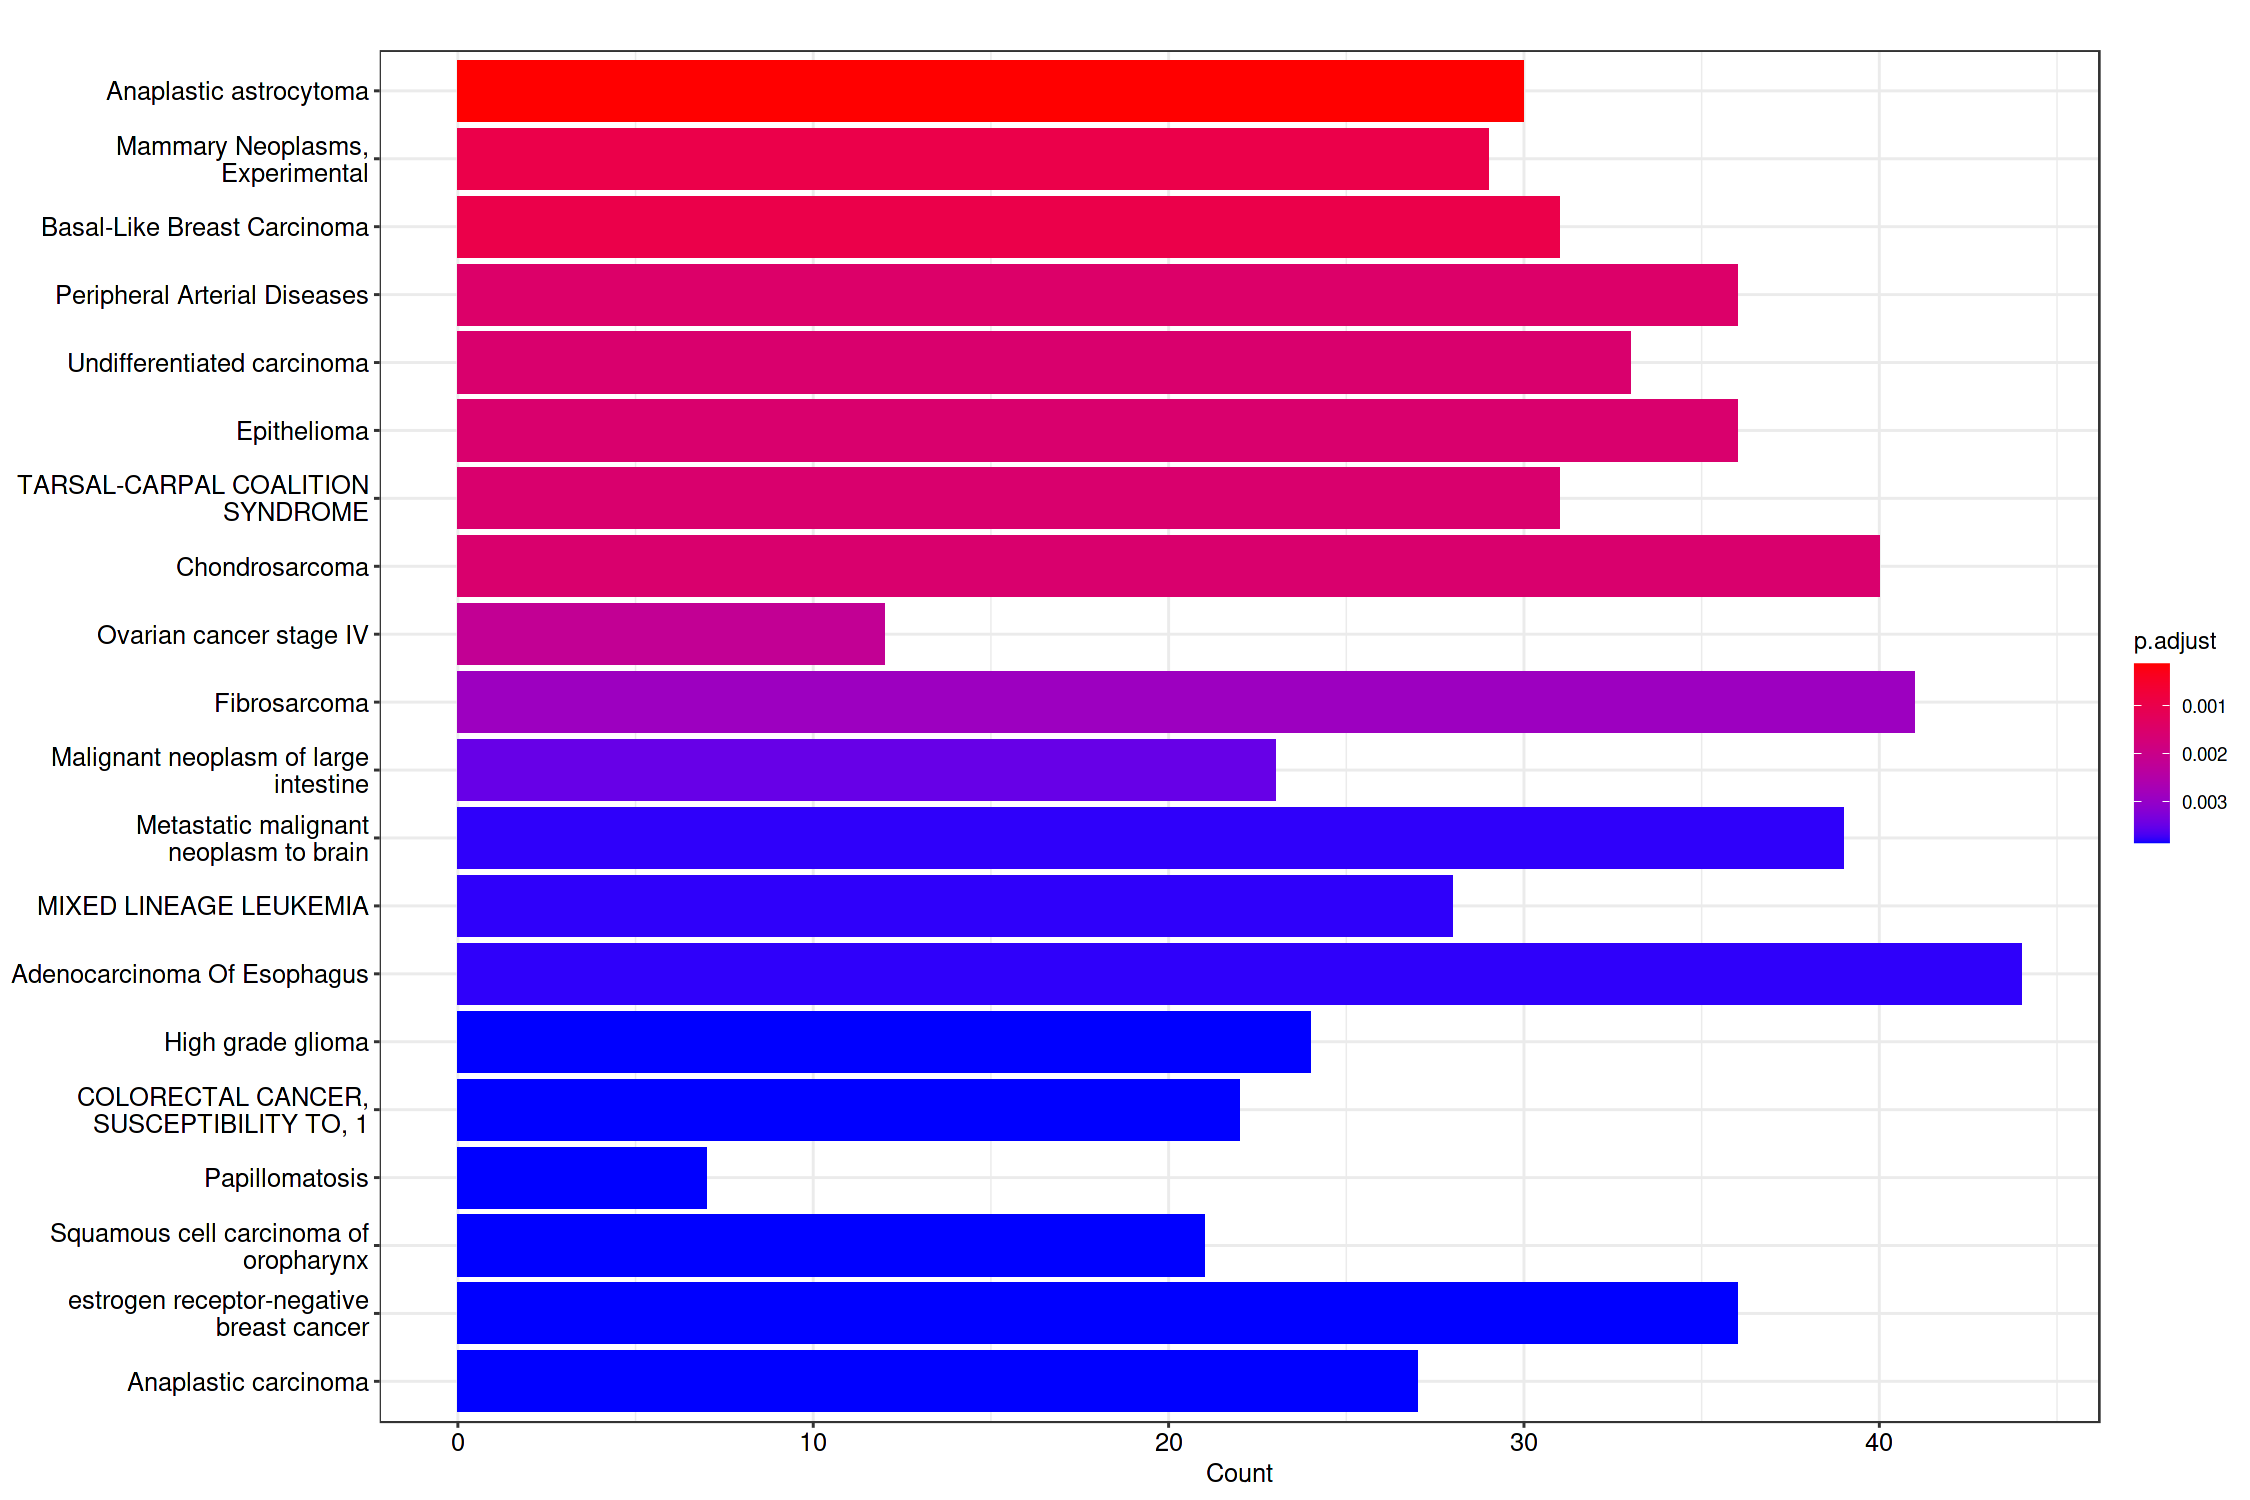

In [50]:
barplot(dgnEnrich, showCategory=20) 

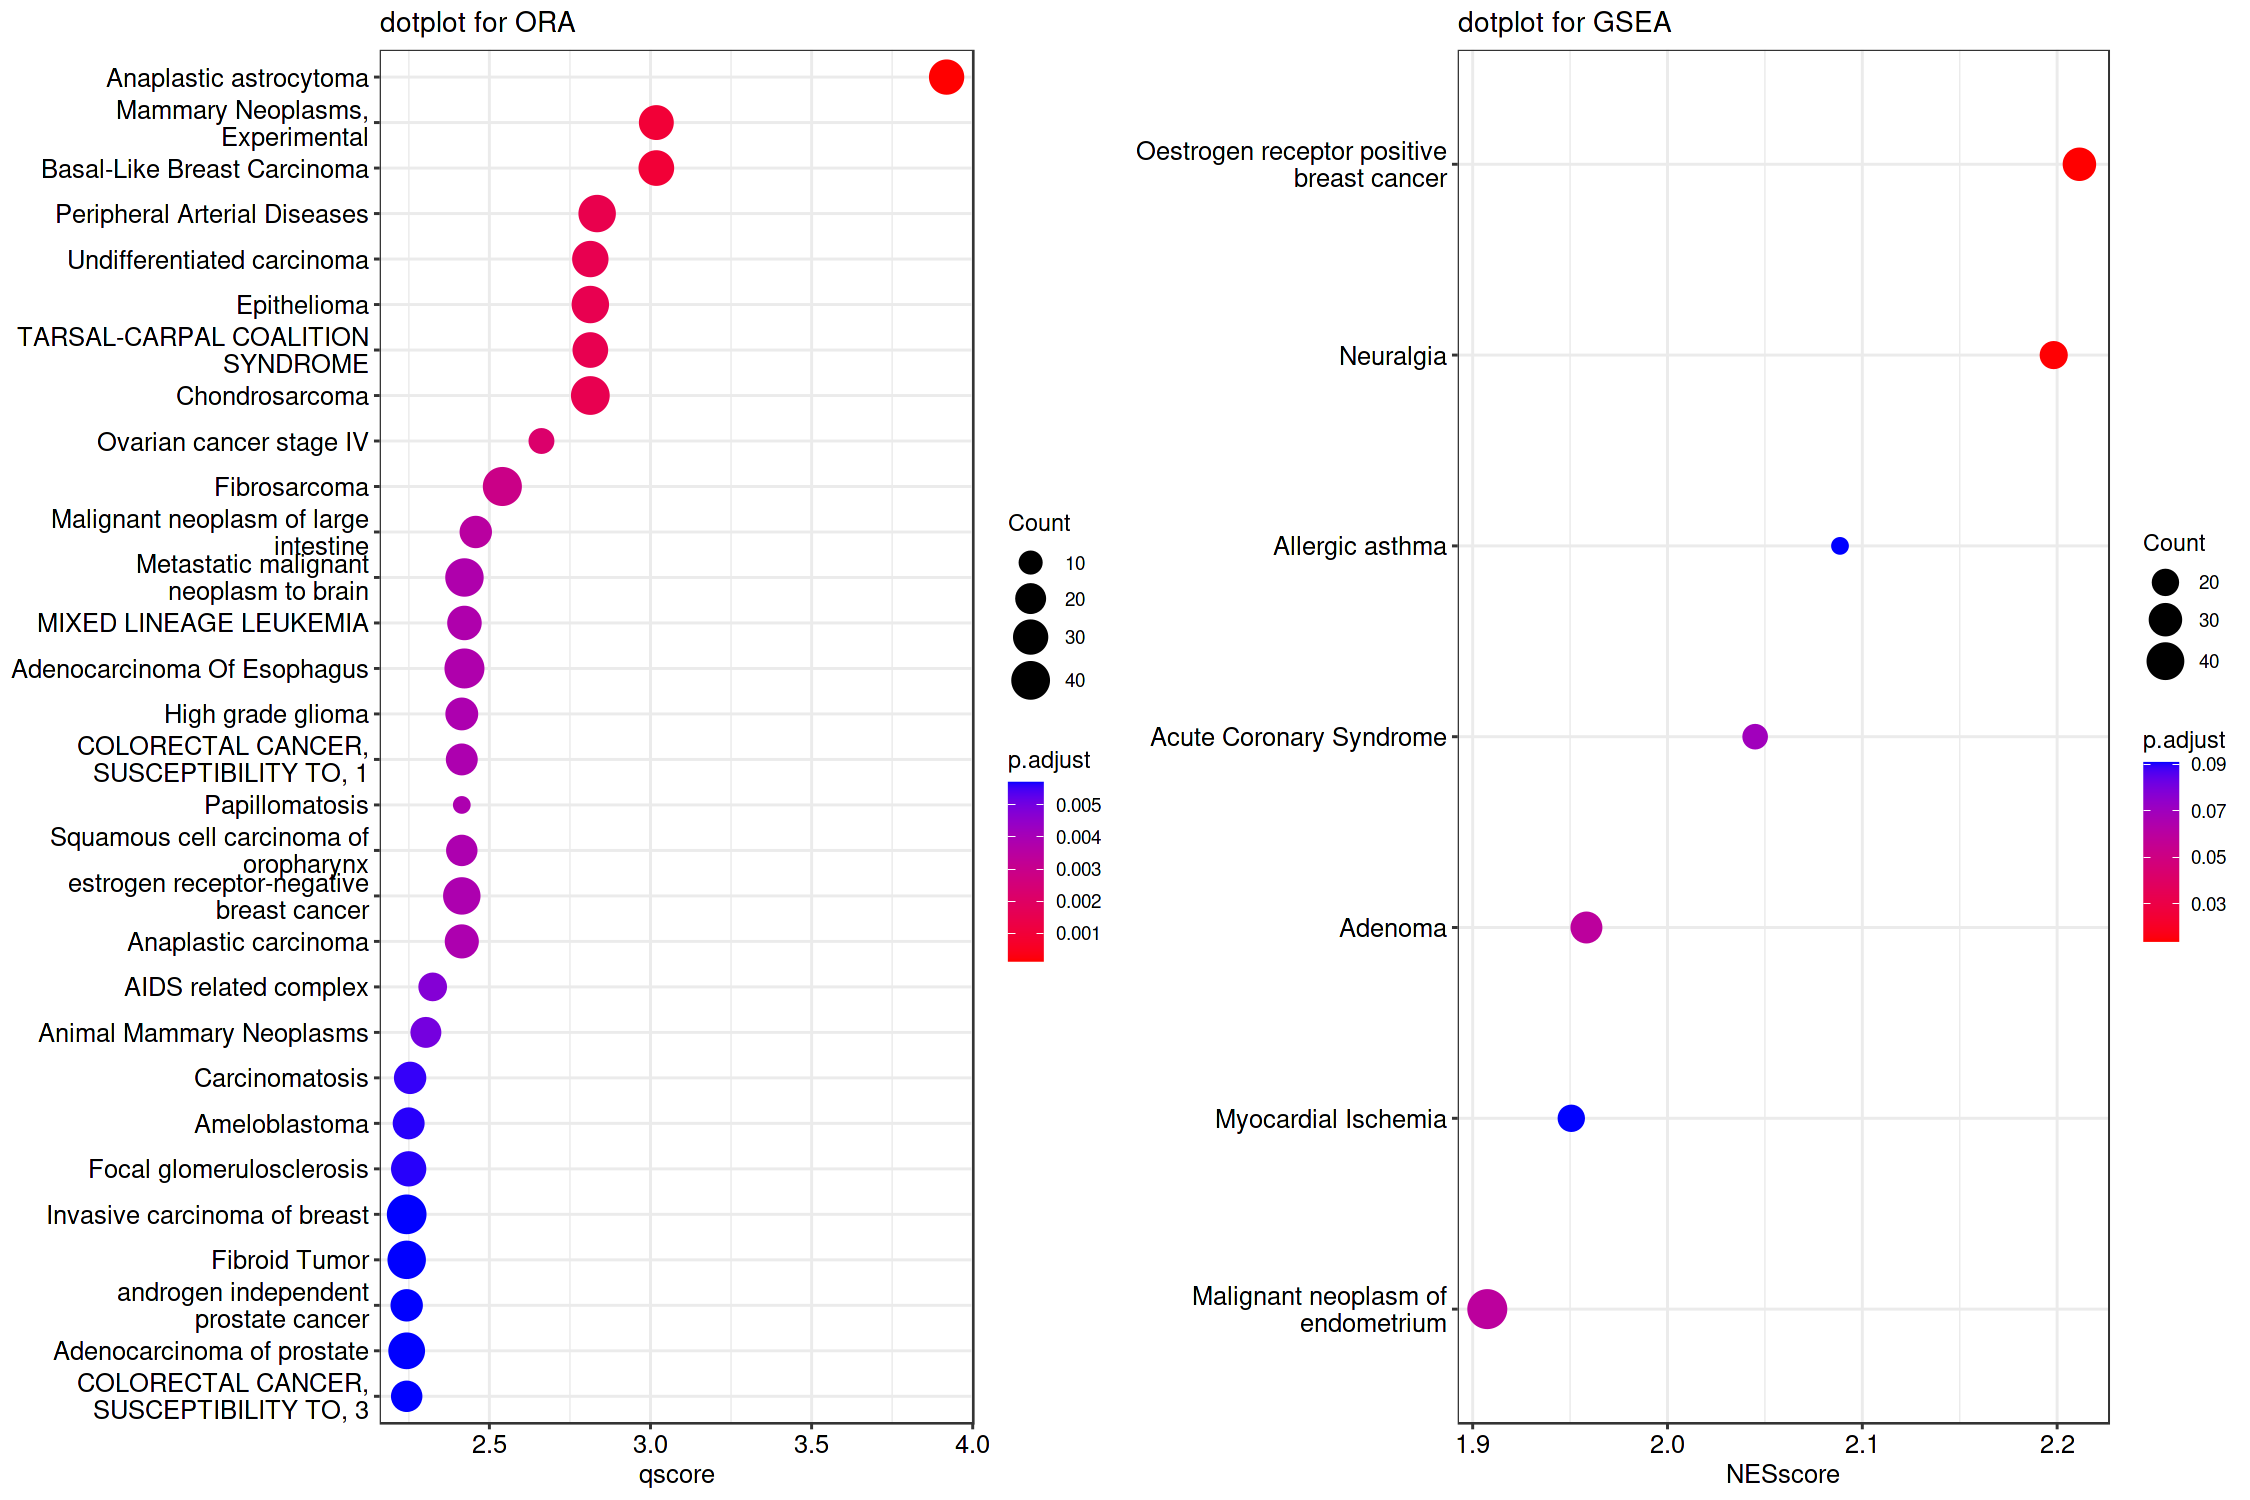

In [51]:
pE=mutate(dgnEnrich, qscore = -log(p.adjust, base=10)) %>%  dotplot( x="qscore", showCategory=30) + ggtitle("dotplot for ORA")
pG=mutate(dgnGSE, NESscore = NES) %>% filter(p.adjust < 0.1) %>% arrange(abs(NESscore)) %>%  dotplot( x="NESscore", showCategory=30) + ggtitle("dotplot for GSEA")

cowplot::plot_grid(pE, pG)

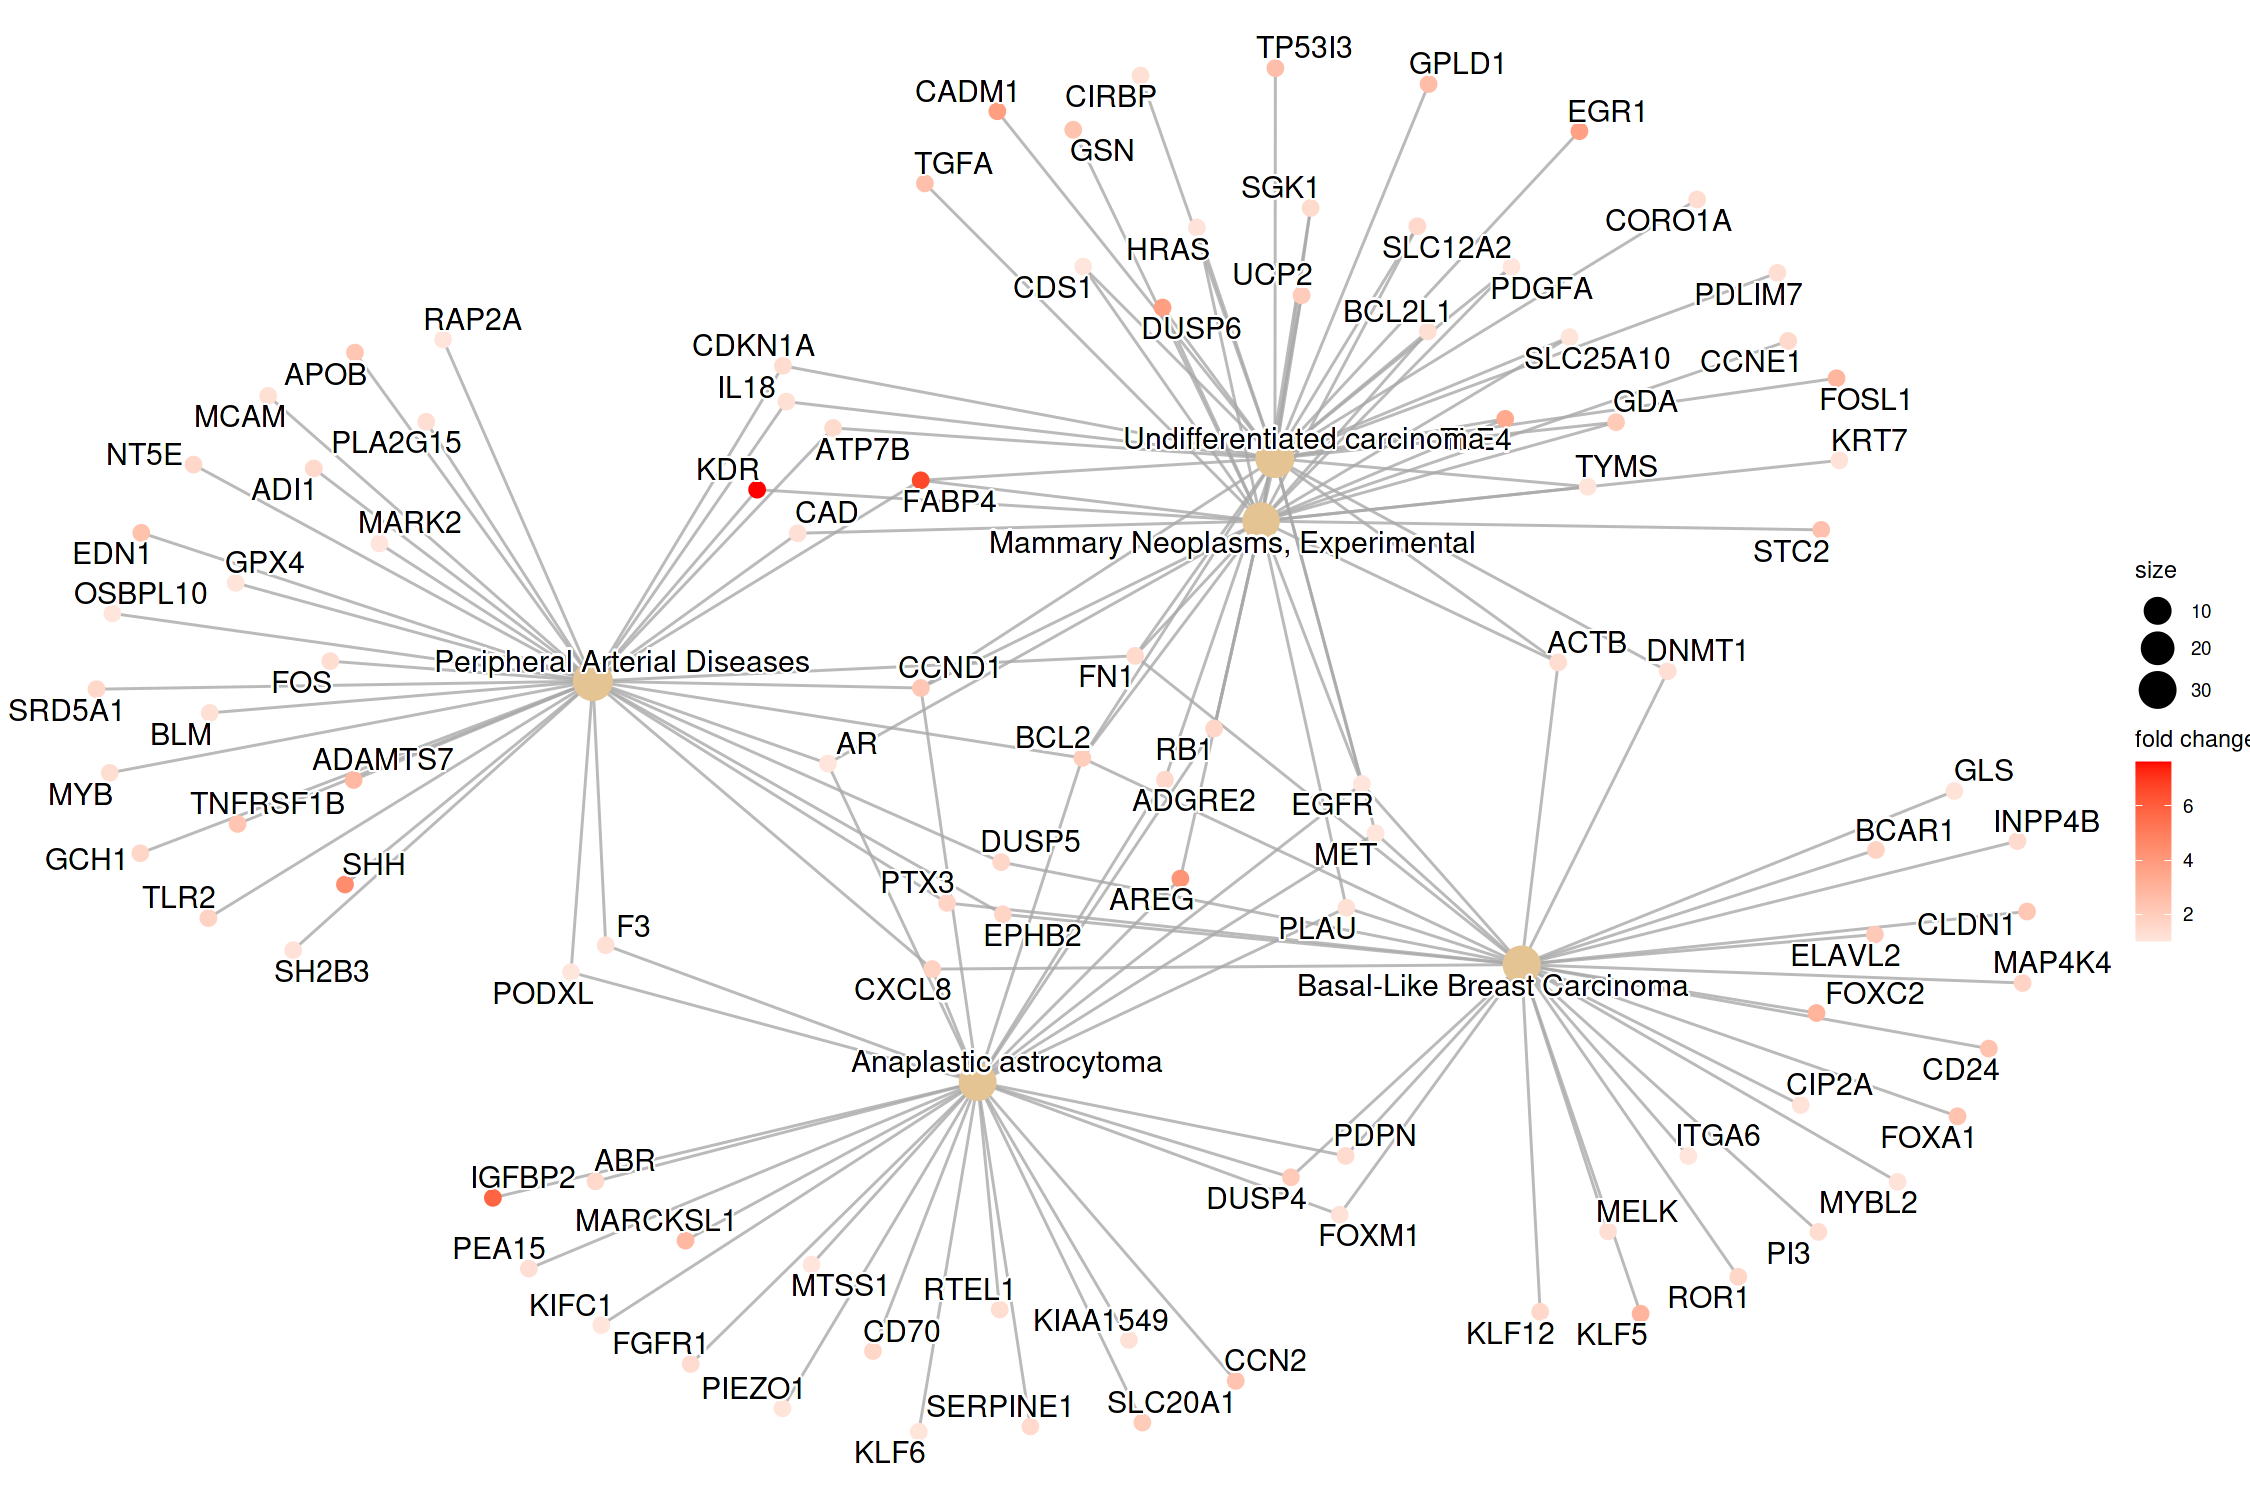

In [52]:
cnetplot(dgnEnrich, categorySize="geneNum", foldChange=geneList)

Warning message:
“Ignoring unknown parameters: align”


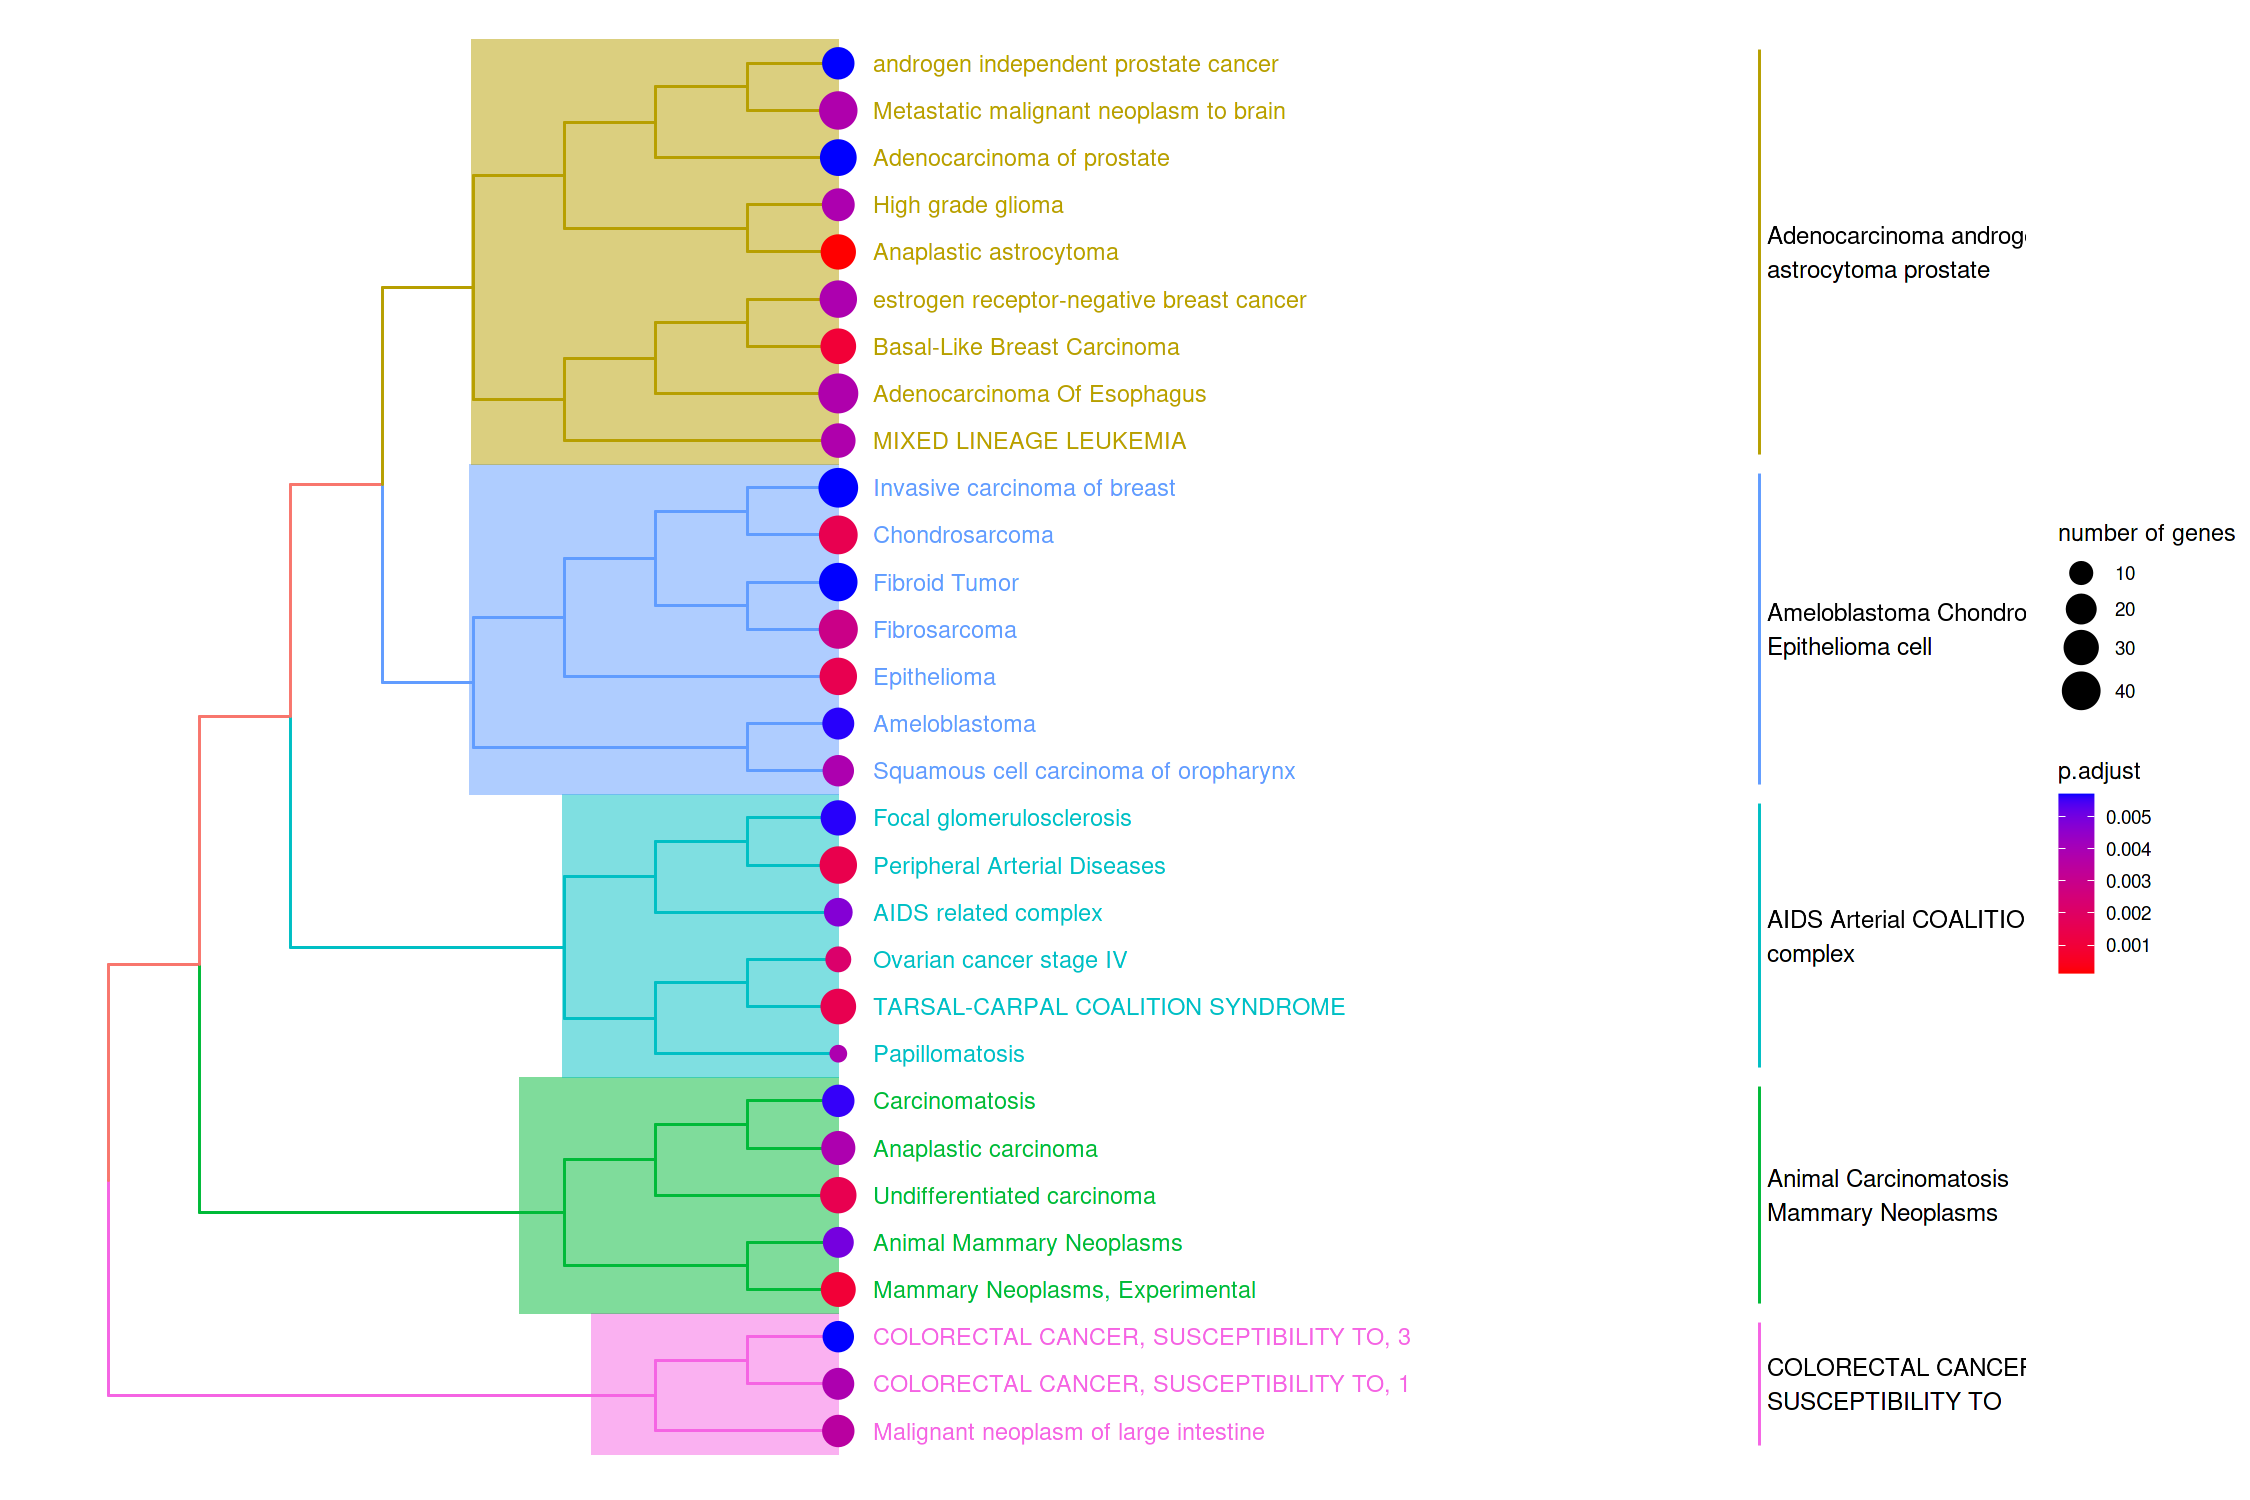

In [53]:
dgnEnrich2 <- pairwise_termsim(dgnEnrich)
treeplot(dgnEnrich2)